In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv("nba_games.csv", index_col = 0)
#df

In [53]:
df = df.sort_values("date")

In [54]:
df = df.reset_index(drop = True)

In [ ]:
bas = ["fg", "ast", "trb", "stl", "blk", "tov"]
adv = ["efg%", "3par", "ast%", "orb%", "ortg", "tov%"]
combo = bas + adv
#pca2 = ["3p", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg"]
pca3 = ["3par", "3pa", "ast%", "blk%", "ast%_opp", "blk%_opp", "blk_opp", "blk", "ast_opp", "ast", "3pa_opp", "3par_opp"]

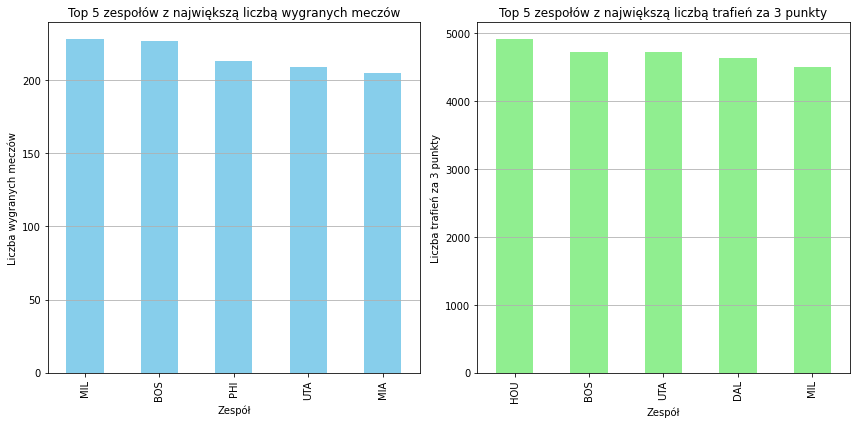

In [27]:
team_wins = df.groupby('team')['won'].sum().sort_values(ascending=False)
team_3pts = df.groupby('team')['3p'].sum().sort_values(ascending=False)

top_teams_wins = team_wins.head(5)
top_teams_3pts = team_3pts.head(5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_teams_wins.plot(kind='bar', color='skyblue')
plt.title('Top 5 zespołów z największą liczbą wygranych meczów')
plt.xlabel('Zespół')
plt.ylabel('Liczba wygranych meczów')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
top_teams_3pts.plot(kind='bar', color='lightgreen')
plt.title('Top 5 zespołów z największą liczbą trafień za 3 punkty')
plt.xlabel('Zespół')
plt.ylabel('Liczba trafień za 3 punkty')
plt.grid(axis='y')

plt.tight_layout()
#plt.savefig("slupek.jpg")

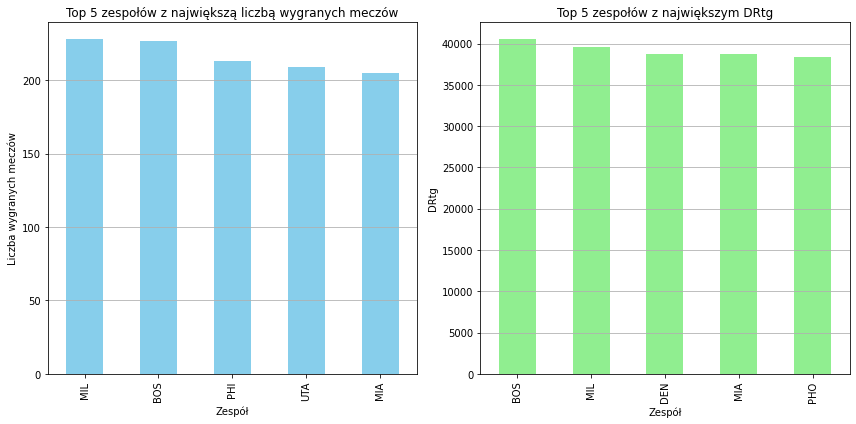

In [28]:
team_wins = df.groupby('team')['won'].sum().sort_values(ascending=False)
team_3pts = df.groupby('team')['drtg'].sum().sort_values(ascending=False)

top_teams_wins = team_wins.head(5)
top_teams_3pts = team_3pts.head(5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_teams_wins.plot(kind='bar', color='skyblue')
plt.title('Top 5 zespołów z największą liczbą wygranych meczów')
plt.xlabel('Zespół')
plt.ylabel('Liczba wygranych meczów')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
top_teams_3pts.plot(kind='bar', color='lightgreen')
plt.title('Top 5 zespołów z największym DRtg')
plt.xlabel('Zespół')
plt.ylabel('DRtg')
plt.grid(axis='y')

plt.tight_layout()
#plt.savefig("slupek2.jpg")

In [49]:
df.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

home
0    0.442242
1    0.557758
dtype: float64

## Regresja logistyczna zbiór testowy

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy = df[bas]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy = model.predict(cechy_testowe)
dokladnosc = accuracy_score(zmienna_testowa, prognozy)
end_time = time.time()
czas  = end_time - start_time
print("Dokładność modelu:", dokladnosc)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy))

Dokładność modelu: 0.7334142394822006
Czas:  0.0638282299041748
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.75      0.72      0.74      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[adv]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy = model.predict(cechy_testowe)
dokladnosc = accuracy_score(zmienna_testowa, prognozy)
end_time = time.time()
czas  = end_time - start_time
print("Dokładność modelu:", dokladnosc)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy))

Dokładność modelu: 0.7317961165048543
Czas:  0.07881546020507812
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.75      0.72      0.74      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[combo]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy = model.predict(cechy_testowe)
dokladnosc = accuracy_score(zmienna_testowa, prognozy)
end_time = time.time()
czas  = end_time - start_time
print("Dokładność modelu:", dokladnosc)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy))

Dokładność modelu: 0.8418284789644013
Czas:  0.11070370674133301
              precision    recall  f1-score   support

       False       0.83      0.85      0.84      1200
        True       0.85      0.84      0.84      1272

    accuracy                           0.84      2472
   macro avg       0.84      0.84      0.84      2472
weighted avg       0.84      0.84      0.84      2472



c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[pca3]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy = model.predict(cechy_testowe)
dokladnosc = accuracy_score(zmienna_testowa, prognozy)
end_time = time.time()
czas  = end_time - start_time
print("Dokładność modelu:", dokladnosc)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy))

Dokładność modelu: 0.80542071197411
Czas:  0.13492441177368164
              precision    recall  f1-score   support

       False       0.80      0.79      0.80      1200
        True       0.81      0.82      0.81      1272

    accuracy                           0.81      2472
   macro avg       0.81      0.81      0.81      2472
weighted avg       0.81      0.81      0.81      2472



c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Regresja logistyczna zmienna treningowa

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[bas]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy_treningowe = model.predict(cechy_treningowe)
dokladnosc_treningowa = accuracy_score(zmienna_treningowa, prognozy_treningowe)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu na danych treningowych:", dokladnosc_treningowa)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe))

Dokładność modelu na danych treningowych: 0.7274076072295657
Czas: 0.06183433532714844
              precision    recall  f1-score   support

       False       0.73      0.74      0.73      3743
        True       0.73      0.72      0.72      3671

    accuracy                           0.73      7414
   macro avg       0.73      0.73      0.73      7414
weighted avg       0.73      0.73      0.73      7414



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[adv]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy_treningowe = model.predict(cechy_treningowe)
dokladnosc_treningowa = accuracy_score(zmienna_treningowa, prognozy_treningowe)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu na danych treningowych:", dokladnosc_treningowa)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe))

Dokładność modelu na danych treningowych: 0.724575128135959
Czas: 0.07679462432861328
              precision    recall  f1-score   support

       False       0.73      0.73      0.73      3743
        True       0.72      0.72      0.72      3671

    accuracy                           0.72      7414
   macro avg       0.72      0.72      0.72      7414
weighted avg       0.72      0.72      0.72      7414



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[combo]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy_treningowe = model.predict(cechy_treningowe)
dokladnosc_treningowa = accuracy_score(zmienna_treningowa, prognozy_treningowe)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu na danych treningowych:", dokladnosc_treningowa)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe))

Dokładność modelu na danych treningowych: 0.8331534933908821
Czas: 0.10671472549438477
              precision    recall  f1-score   support

       False       0.83      0.84      0.84      3743
        True       0.83      0.83      0.83      3671

    accuracy                           0.83      7414
   macro avg       0.83      0.83      0.83      7414
weighted avg       0.83      0.83      0.83      7414



c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]

cechy = df[pca3]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(cechy_treningowe, zmienna_treningowa)

prognozy_treningowe = model.predict(cechy_treningowe)
dokladnosc_treningowa = accuracy_score(zmienna_treningowa, prognozy_treningowe)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu na danych treningowych:", dokladnosc_treningowa)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe))

Dokładność modelu na danych treningowych: 0.816158618829242
Czas: 0.10970449447631836
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      3743
        True       0.82      0.81      0.81      3671

    accuracy                           0.82      7414
   macro avg       0.82      0.82      0.82      7414
weighted avg       0.82      0.82      0.82      7414



c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Metoda KNN zbiór testowy

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy_KNN = df[bas]   
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors= 5)  
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_knn = model_knn.predict(cechy_testowe_KNN)
dokladnosc_knn = accuracy_score(zmienna_testowa_KNN, prognozy_knn)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu KNN:", dokladnosc_knn)
print("Czas ", czas)
print(classification_report(zmienna_testowa_KNN, prognozy_knn))

Dokładność modelu KNN: 0.6840614886731392
Czas  0.2004997730255127
              precision    recall  f1-score   support

       False       0.67      0.70      0.68      1200
        True       0.70      0.67      0.68      1272

    accuracy                           0.68      2472
   macro avg       0.68      0.68      0.68      2472
weighted avg       0.69      0.68      0.68      2472



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy_KNN = df[adv]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors= 5) 
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_knn = model_knn.predict(cechy_testowe_KNN)
dokladnosc_knn = accuracy_score(zmienna_testowa_KNN, prognozy_knn)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu KNN:", dokladnosc_knn)
print("Czas ", czas)
print(classification_report(zmienna_testowa_KNN, prognozy_knn))

Dokładność modelu KNN: 0.7241100323624595
Czas  0.1296546459197998
              precision    recall  f1-score   support

       False       0.70      0.74      0.72      1200
        True       0.74      0.71      0.72      1272

    accuracy                           0.72      2472
   macro avg       0.72      0.72      0.72      2472
weighted avg       0.73      0.72      0.72      2472



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy_KNN = df[combo]   
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors= 5)  
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_knn = model_knn.predict(cechy_testowe_KNN)
dokladnosc_knn = accuracy_score(zmienna_testowa_KNN, prognozy_knn)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu KNN:", dokladnosc_knn)
print("Czas ", czas)
print(classification_report(zmienna_testowa_KNN, prognozy_knn))

Dokładność modelu KNN: 0.8009708737864077
Czas  0.24034738540649414
              precision    recall  f1-score   support

       False       0.78      0.82      0.80      1200
        True       0.82      0.78      0.80      1272

    accuracy                           0.80      2472
   macro avg       0.80      0.80      0.80      2472
weighted avg       0.80      0.80      0.80      2472



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy_KNN = df[pca3]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors= 5)  
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_knn = model_knn.predict(cechy_testowe_KNN)
dokladnosc_knn = accuracy_score(zmienna_testowa_KNN, prognozy_knn)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu KNN:", dokladnosc_knn)
print("Czas ", czas)
print(classification_report(zmienna_testowa_KNN, prognozy_knn))

Dokładność modelu KNN: 0.7172330097087378
Czas  0.29025793075561523
              precision    recall  f1-score   support

       False       0.71      0.71      0.71      1200
        True       0.73      0.72      0.72      1272

    accuracy                           0.72      2472
   macro avg       0.72      0.72      0.72      2472
weighted avg       0.72      0.72      0.72      2472



## KNN dla zbioru treningowego

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy_KNN = df[bas]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors= 5)
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_treningowe_knn = model_knn.predict(cechy_treningowe_KNN)
dokladnosc_treningowa_knn = accuracy_score(zmienna_treningowa_KNN, prognozy_treningowe_knn)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu KNN na danych treningowych:", dokladnosc_treningowa_knn)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_KNN, prognozy_treningowe_knn))

Dokładność modelu KNN na danych treningowych: 0.7414351227407607
Czas: 0.48769426345825195
              precision    recall  f1-score   support

       False       0.74      0.75      0.75      3743
        True       0.74      0.73      0.74      3671

    accuracy                           0.74      7414
   macro avg       0.74      0.74      0.74      7414
weighted avg       0.74      0.74      0.74      7414



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy_KNN = df[adv]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_treningowe_knn = model_knn.predict(cechy_treningowe_KNN)
dokladnosc_treningowa_knn = accuracy_score(zmienna_treningowa_KNN, prognozy_treningowe_knn)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu KNN na danych treningowych:", dokladnosc_treningowa_knn)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_KNN, prognozy_treningowe_knn))

Dokładność modelu KNN na danych treningowych: 0.7321284057189101
Czas: 0.3291192054748535
              precision    recall  f1-score   support

       False       0.73      0.75      0.74      3743
        True       0.74      0.71      0.72      3671

    accuracy                           0.73      7414
   macro avg       0.73      0.73      0.73      7414
weighted avg       0.73      0.73      0.73      7414



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy_KNN = df[combo]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_treningowe_knn = model_knn.predict(cechy_treningowe_KNN)
dokladnosc_treningowa_knn = accuracy_score(zmienna_treningowa_KNN, prognozy_treningowe_knn)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu KNN na danych treningowych:", dokladnosc_treningowa_knn)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_KNN, prognozy_treningowe_knn))

Dokładność modelu KNN na danych treningowych: 0.8149446992176963
Czas: 0.6512563228607178
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      3743
        True       0.82      0.80      0.81      3671

    accuracy                           0.81      7414
   macro avg       0.82      0.81      0.81      7414
weighted avg       0.82      0.81      0.81      7414



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy_KNN = df[pca3]  
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)

prognozy_treningowe_knn = model_knn.predict(cechy_treningowe_KNN)
dokladnosc_treningowa_knn = accuracy_score(zmienna_treningowa_KNN, prognozy_treningowe_knn)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu KNN na danych treningowych:", dokladnosc_treningowa_knn)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_KNN, prognozy_treningowe_knn))

Dokładność modelu KNN na danych treningowych: 0.7499325600215808
Czas: 0.7879226207733154
              precision    recall  f1-score   support

       False       0.75      0.76      0.75      3743
        True       0.75      0.74      0.75      3671

    accuracy                           0.75      7414
   macro avg       0.75      0.75      0.75      7414
weighted avg       0.75      0.75      0.75      7414



## Naive Bayes zestaw testowy 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy = df[bas]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu Naive Bayes:", dokladnosc_nb)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy_nb))

Dokładność modelu Naive Bayes: 0.7168284789644013
Czas:  0.01496124267578125
              precision    recall  f1-score   support

       False       0.69      0.75      0.72      1200
        True       0.74      0.69      0.71      1272

    accuracy                           0.72      2472
   macro avg       0.72      0.72      0.72      2472
weighted avg       0.72      0.72      0.72      2472



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy = df[adv] 
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu Naive Bayes:", dokladnosc_nb)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy_nb))

Dokładność modelu Naive Bayes: 0.7326051779935275
Czas:  0.010971546173095703
              precision    recall  f1-score   support

       False       0.72      0.75      0.73      1200
        True       0.75      0.72      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy = df[combo] 
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu Naive Bayes:", dokladnosc_nb)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy_nb))

Dokładność modelu Naive Bayes: 0.7495954692556634
Czas:  0.01496124267578125
              precision    recall  f1-score   support

       False       0.73      0.76      0.75      1200
        True       0.77      0.74      0.75      1272

    accuracy                           0.75      2472
   macro avg       0.75      0.75      0.75      2472
weighted avg       0.75      0.75      0.75      2472



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

cechy = df[pca3]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu Naive Bayes:", dokladnosc_nb)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy_nb))

Dokładność modelu Naive Bayes: 0.6694983818770227
Czas:  0.01595616340637207
              precision    recall  f1-score   support

       False       0.66      0.67      0.66      1200
        True       0.68      0.67      0.68      1272

    accuracy                           0.67      2472
   macro avg       0.67      0.67      0.67      2472
weighted avg       0.67      0.67      0.67      2472



## Naive Bayes zestaw treningowy

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy = df[bas] 
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_treningowe_nb = model_nb.predict(cechy_treningowe_scaled)
dokladnosc_treningowa_nb = accuracy_score(zmienna_treningowa, prognozy_treningowe_nb)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu Naive Bayes na danych treningowych:", dokladnosc_treningowa_nb)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe_nb))

Dokładność modelu Naive Bayes na danych treningowych: 0.7178311302940383
Czas: 0.01394343376159668
              precision    recall  f1-score   support

       False       0.71      0.74      0.73      3743
        True       0.73      0.69      0.71      3671

    accuracy                           0.72      7414
   macro avg       0.72      0.72      0.72      7414
weighted avg       0.72      0.72      0.72      7414



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy = df[adv] 
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_treningowe_nb = model_nb.predict(cechy_treningowe_scaled)
dokladnosc_treningowa_nb = accuracy_score(zmienna_treningowa, prognozy_treningowe_nb)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu Naive Bayes na danych treningowych:", dokladnosc_treningowa_nb)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe_nb))

Dokładność modelu Naive Bayes na danych treningowych: 0.7214728891286755
Czas: 0.012964725494384766
              precision    recall  f1-score   support

       False       0.72      0.73      0.73      3743
        True       0.72      0.71      0.72      3671

    accuracy                           0.72      7414
   macro avg       0.72      0.72      0.72      7414
weighted avg       0.72      0.72      0.72      7414



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy = df[combo] 
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_treningowe_nb = model_nb.predict(cechy_treningowe_scaled)
dokladnosc_treningowa_nb = accuracy_score(zmienna_treningowa, prognozy_treningowe_nb)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu Naive Bayes na danych treningowych:", dokladnosc_treningowa_nb)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe_nb))

Dokładność modelu Naive Bayes na danych treningowych: 0.7516859994604802
Czas: 0.021941423416137695
              precision    recall  f1-score   support

       False       0.75      0.76      0.76      3743
        True       0.75      0.74      0.75      3671

    accuracy                           0.75      7414
   macro avg       0.75      0.75      0.75      7414
weighted avg       0.75      0.75      0.75      7414



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

cechy = df[pca3] 
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_treningowe_nb = model_nb.predict(cechy_treningowe_scaled)
dokladnosc_treningowa_nb = accuracy_score(zmienna_treningowa, prognozy_treningowe_nb)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu Naive Bayes na danych treningowych:", dokladnosc_treningowa_nb)
print("Czas:", czas)
print(classification_report(zmienna_treningowa, prognozy_treningowe_nb))

Dokładność modelu Naive Bayes na danych treningowych: 0.6696789857027245
Czas: 0.023935556411743164
              precision    recall  f1-score   support

       False       0.67      0.67      0.67      3743
        True       0.67      0.67      0.67      3671

    accuracy                           0.67      7414
   macro avg       0.67      0.67      0.67      7414
weighted avg       0.67      0.67      0.67      7414



## SVM testowy

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[bas] 
zmienna_zalezna_SVM = df['won'] 

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_svm = model_svm.predict(cechy_testowe_SVM)
dokladnosc_svm = accuracy_score(zmienna_testowa_SVM, prognozy_svm)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu SVM:", dokladnosc_svm)
print("Czas: ", czas)
print(classification_report(zmienna_testowa_SVM, prognozy_svm))

Dokładność modelu SVM: 0.7326051779935275
Czas:  7.737300634384155
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.75      0.72      0.74      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[adv] 
zmienna_zalezna_SVM = df['won']  

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_svm = model_svm.predict(cechy_testowe_SVM)
dokladnosc_svm = accuracy_score(zmienna_testowa_SVM, prognozy_svm)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu SVM:", dokladnosc_svm)
print("Czas: ", czas)
print(classification_report(zmienna_testowa_SVM, prognozy_svm))

Dokładność modelu SVM: 0.7301779935275081
Czas:  10.908851623535156
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.74      0.72      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[combo] 
zmienna_zalezna_SVM = df['won']  

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_svm = model_svm.predict(cechy_testowe_SVM)
dokladnosc_svm = accuracy_score(zmienna_testowa_SVM, prognozy_svm)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu SVM:", dokladnosc_svm)
print("Czas: ", czas)
print(classification_report(zmienna_testowa_SVM, prognozy_svm))

Dokładność modelu SVM: 0.8612459546925566
Czas:  9.165794372558594
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1200
        True       0.88      0.84      0.86      1272

    accuracy                           0.86      2472
   macro avg       0.86      0.86      0.86      2472
weighted avg       0.86      0.86      0.86      2472



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()
#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[pca3] 
zmienna_zalezna_SVM = df['won']  

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_svm = model_svm.predict(cechy_testowe_SVM)
dokladnosc_svm = accuracy_score(zmienna_testowa_SVM, prognozy_svm)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu SVM:", dokladnosc_svm)
print("Czas: ", czas)
print(classification_report(zmienna_testowa_SVM, prognozy_svm))

Dokładność modelu SVM: 0.8114886731391586
Czas:  12.60930061340332
              precision    recall  f1-score   support

       False       0.81      0.80      0.80      1200
        True       0.81      0.83      0.82      1272

    accuracy                           0.81      2472
   macro avg       0.81      0.81      0.81      2472
weighted avg       0.81      0.81      0.81      2472



## SVM treningowy

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[bas]  
zmienna_zalezna_SVM = df['won'] 

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_treningowe_svm = model_svm.predict(cechy_treningowe_SVM)
dokladnosc_treningowa_svm = accuracy_score(zmienna_treningowa_SVM, prognozy_treningowe_svm)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu SVM na danych treningowych:", dokladnosc_treningowa_svm)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_SVM, prognozy_treningowe_svm))

Dokładność modelu SVM na danych treningowych: 0.7282168869705962
Czas: 8.027691125869751
              precision    recall  f1-score   support

       False       0.73      0.74      0.73      3743
        True       0.73      0.72      0.72      3671

    accuracy                           0.73      7414
   macro avg       0.73      0.73      0.73      7414
weighted avg       0.73      0.73      0.73      7414



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()

pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[adv]  
zmienna_zalezna_SVM = df['won'] 

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_treningowe_svm = model_svm.predict(cechy_treningowe_SVM)
dokladnosc_treningowa_svm = accuracy_score(zmienna_treningowa_SVM, prognozy_treningowe_svm)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu SVM na danych treningowych:", dokladnosc_treningowa_svm)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_SVM, prognozy_treningowe_svm))

Dokładność modelu SVM na danych treningowych: 0.7263285675748584
Czas: 11.449358463287354
              precision    recall  f1-score   support

       False       0.73      0.73      0.73      3743
        True       0.73      0.72      0.72      3671

    accuracy                           0.73      7414
   macro avg       0.73      0.73      0.73      7414
weighted avg       0.73      0.73      0.73      7414



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()

pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[combo]  
zmienna_zalezna_SVM = df['won'] 

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_treningowe_svm = model_svm.predict(cechy_treningowe_SVM)
dokladnosc_treningowa_svm = accuracy_score(zmienna_treningowa_SVM, prognozy_treningowe_svm)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu SVM na danych treningowych:", dokladnosc_treningowa_svm)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_SVM, prognozy_treningowe_svm))

Dokładność modelu SVM na danych treningowych: 0.8555435662260588
Czas: 9.39785885810852
              precision    recall  f1-score   support

       False       0.85      0.86      0.86      3743
        True       0.86      0.85      0.85      3671

    accuracy                           0.86      7414
   macro avg       0.86      0.86      0.86      7414
weighted avg       0.86      0.86      0.86      7414



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time 

start_time = time.time()

pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy_SVM = df[pca3]  
zmienna_zalezna_SVM = df['won'] 

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC(kernel='linear')
model_svm.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

prognozy_treningowe_svm = model_svm.predict(cechy_treningowe_SVM)
dokladnosc_treningowa_svm = accuracy_score(zmienna_treningowa_SVM, prognozy_treningowe_svm)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu SVM na danych treningowych:", dokladnosc_treningowa_svm)
print("Czas:", czas)
print(classification_report(zmienna_treningowa_SVM, prognozy_treningowe_svm))

Dokładność modelu SVM na danych treningowych: 0.818451578095495
Czas: 13.125961303710938
              precision    recall  f1-score   support

       False       0.82      0.83      0.82      3743
        True       0.82      0.81      0.82      3671

    accuracy                           0.82      7414
   macro avg       0.82      0.82      0.82      7414
weighted avg       0.82      0.82      0.82      7414



## Las losowy testowy

In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[bas]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf = model_rf.predict(cechy_testowe)
dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
print("Dokładność modelu RandomForestClassifier:", dokladnosc_rf)
print(classification_report(zmienna_testowa, prognozy_rf))

Dokładność modelu RandomForestClassifier: 0.6970064724919094
              precision    recall  f1-score   support

       False       0.68      0.70      0.69      1200
        True       0.71      0.69      0.70      1272

    accuracy                           0.70      2472
   macro avg       0.70      0.70      0.70      2472
weighted avg       0.70      0.70      0.70      2472



In [44]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


cechy = df[adv]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf = model_rf.predict(cechy_testowe)
dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
print("Dokładność modelu RandomForestClassifier:", dokladnosc_rf)
print(classification_report(zmienna_testowa, prognozy_rf))

Dokładność modelu RandomForestClassifier: 0.7265372168284789
              precision    recall  f1-score   support

       False       0.70      0.75      0.73      1200
        True       0.75      0.70      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [45]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[combo]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf = model_rf.predict(cechy_testowe)
dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
print("Dokładność modelu RandomForestClassifier:", dokladnosc_rf)
print(classification_report(zmienna_testowa, prognozy_rf))

Dokładność modelu RandomForestClassifier: 0.8260517799352751
              precision    recall  f1-score   support

       False       0.81      0.84      0.82      1200
        True       0.84      0.81      0.83      1272

    accuracy                           0.83      2472
   macro avg       0.83      0.83      0.83      2472
weighted avg       0.83      0.83      0.83      2472



In [46]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[pca3] 
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)


model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf = model_rf.predict(cechy_testowe)
dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
print("Dokładność modelu RandomForestClassifier:", dokladnosc_rf)
print(classification_report(zmienna_testowa, prognozy_rf))

Dokładność modelu RandomForestClassifier: 0.7427184466019418
              precision    recall  f1-score   support

       False       0.73      0.75      0.74      1200
        True       0.76      0.74      0.75      1272

    accuracy                           0.74      2472
   macro avg       0.74      0.74      0.74      2472
weighted avg       0.74      0.74      0.74      2472



## Las treningowy

In [55]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[bas] 
zmienna_zalezna = df['won']  


cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf_treningowe = model_rf.predict(cechy_treningowe)
dokladnosc_rf_treningowe = accuracy_score(zmienna_treningowa, prognozy_rf_treningowe)

print("Dokładność modelu RandomForestClassifier na danych treningowych:", dokladnosc_rf_treningowe)
print(classification_report(zmienna_treningowa, prognozy_rf_treningowe))

Dokładność modelu RandomForestClassifier na danych treningowych: 0.9997302400863232
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3743
        True       1.00      1.00      1.00      3671

    accuracy                           1.00      7414
   macro avg       1.00      1.00      1.00      7414
weighted avg       1.00      1.00      1.00      7414



In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[adv]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf_treningowe = model_rf.predict(cechy_treningowe)
dokladnosc_rf_treningowe = accuracy_score(zmienna_treningowa, prognozy_rf_treningowe)

print("Dokładność modelu RandomForestClassifier na danych treningowych:", dokladnosc_rf_treningowe)
print(classification_report(zmienna_treningowa, prognozy_rf_treningowe))

Dokładność modelu RandomForestClassifier na danych treningowych: 0.9997302400863232
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3743
        True       1.00      1.00      1.00      3671

    accuracy                           1.00      7414
   macro avg       1.00      1.00      1.00      7414
weighted avg       1.00      1.00      1.00      7414



In [48]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


cechy = df[combo]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf_treningowe = model_rf.predict(cechy_treningowe)
dokladnosc_rf_treningowe = accuracy_score(zmienna_treningowa, prognozy_rf_treningowe)

print("Dokładność modelu RandomForestClassifier na danych treningowych:", dokladnosc_rf_treningowe)
print(classification_report(zmienna_treningowa, prognozy_rf_treningowe))

Dokładność modelu RandomForestClassifier na danych treningowych: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3743
        True       1.00      1.00      1.00      3671

    accuracy                           1.00      7414
   macro avg       1.00      1.00      1.00      7414
weighted avg       1.00      1.00      1.00      7414



In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

cechy = df[pca3] 
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(cechy_treningowe, zmienna_treningowa)

prognozy_rf_treningowe = model_rf.predict(cechy_treningowe)
dokladnosc_rf_treningowe = accuracy_score(zmienna_treningowa, prognozy_rf_treningowe)

print("Dokładność modelu RandomForestClassifier na danych treningowych:", dokladnosc_rf_treningowe)
print(classification_report(zmienna_treningowa, prognozy_rf_treningowe))

Dokładność modelu RandomForestClassifier na danych treningowych: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3743
        True       1.00      1.00      1.00      3671

    accuracy                           1.00      7414
   macro avg       1.00      1.00      1.00      7414
weighted avg       1.00      1.00      1.00      7414



## Sieć neuronowa testowa

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)


cechy = df[bas].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred_classes == y_test)
print("Dokładność modelu:", accuracy)
print(classification_report(y_test, y_pred_classes))

Epoch 100/1000 - Loss: 0.6443469587386594
Epoch 200/1000 - Loss: 0.6985819005497567
Epoch 300/1000 - Loss: 0.6863852845228293
Epoch 400/1000 - Loss: 0.666321977622729
Epoch 500/1000 - Loss: 0.6555250465165553
Epoch 600/1000 - Loss: 0.7515759057338534
Epoch 700/1000 - Loss: 0.6670446858158289
Epoch 800/1000 - Loss: 0.5715024693126255
Epoch 900/1000 - Loss: 0.6280987840150927
Epoch 1000/1000 - Loss: 0.6635447412801909
Dokładność modelu: 0.7257281553398058
              precision    recall  f1-score   support

       False       0.70      0.77      0.73      1200
        True       0.76      0.68      0.72      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicjalizacja wag
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)


cechy = df[adv].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred_classes == y_test)
print("Dokładność modelu:", accuracy)
print(classification_report(y_test, y_pred_classes))

Epoch 100/1000 - Loss: 0.5834629330458475
Epoch 200/1000 - Loss: 0.6931592792151634
Epoch 300/1000 - Loss: 0.6988195764793562
Epoch 400/1000 - Loss: 0.5991383677809394
Epoch 500/1000 - Loss: 0.5670052334923905
Epoch 600/1000 - Loss: 0.5816708119574845
Epoch 700/1000 - Loss: 0.604120190509129
Epoch 800/1000 - Loss: 0.6931169952334296
Epoch 900/1000 - Loss: 0.7887327095751224
Epoch 1000/1000 - Loss: 0.7790772933001263
Dokładność modelu: 0.7168284789644013
              precision    recall  f1-score   support

       False       0.65      0.88      0.75      1200
        True       0.84      0.56      0.67      1272

    accuracy                           0.72      2472
   macro avg       0.75      0.72      0.71      2472
weighted avg       0.75      0.72      0.71      2472



In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)


cechy = df[combo].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred_classes == y_test)
print("Dokładność modelu:", accuracy)
print(classification_report(y_test, y_pred_classes))

Epoch 100/1000 - Loss: 0.37470919313872186
Epoch 200/1000 - Loss: 0.3658467549006001
Epoch 300/1000 - Loss: 0.361619318915731
Epoch 400/1000 - Loss: 0.3579468393549162
Epoch 500/1000 - Loss: 0.35556911192056545
Epoch 600/1000 - Loss: 0.35384788441309684
Epoch 700/1000 - Loss: 0.35251032808880556
Epoch 800/1000 - Loss: 0.3513924912845591
Epoch 900/1000 - Loss: 0.3503975312243549
Epoch 1000/1000 - Loss: 0.3494619227116579
Dokładność modelu: 0.8470873786407767
              precision    recall  f1-score   support

       False       0.79      0.93      0.85      1200
        True       0.92      0.77      0.84      1272

    accuracy                           0.85      2472
   macro avg       0.86      0.85      0.85      2472
weighted avg       0.86      0.85      0.85      2472



In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)


cechy = df[pca3].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred_classes == y_test)
print("Dokładność modelu:", accuracy)
print(classification_report(y_test, y_pred_classes))

Epoch 100/1000 - Loss: 0.4633371018968659
Epoch 200/1000 - Loss: 0.4166875400619387
Epoch 300/1000 - Loss: 0.4029205203107368
Epoch 400/1000 - Loss: 0.3960545685801412
Epoch 500/1000 - Loss: 0.3915795241907978
Epoch 600/1000 - Loss: 0.38847929747891435
Epoch 700/1000 - Loss: 0.38610456883992994
Epoch 800/1000 - Loss: 0.3841255873581283
Epoch 900/1000 - Loss: 0.38240780018138465
Epoch 1000/1000 - Loss: 0.3809214575883532
Dokładność modelu: 0.8102750809061489
              precision    recall  f1-score   support

       False       0.77      0.88      0.82      1200
        True       0.87      0.75      0.80      1272

    accuracy                           0.81      2472
   macro avg       0.82      0.81      0.81      2472
weighted avg       0.82      0.81      0.81      2472



## Sieć neuronowa treningowa

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        # Obliczenie błędu
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

cechy = df[bas].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_train_pred = nn.predict(X_train)
y_train_pred_classes = (y_train_pred > 0.5).astype(int)

y_test_pred = nn.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

train_accuracy = np.mean(y_train_pred_classes == y_train)
print("Dokładność modelu na zbiorze treningowym:", train_accuracy)

Epoch 100/1000 - Loss: 0.6918837841100325
Epoch 200/1000 - Loss: 0.6931883836574448
Epoch 300/1000 - Loss: 0.6749843254034802
Epoch 400/1000 - Loss: 0.6527942114056079
Epoch 500/1000 - Loss: 0.6087312770392374
Epoch 600/1000 - Loss: 0.6650078191129892
Epoch 700/1000 - Loss: 0.587617577170934
Epoch 800/1000 - Loss: 0.7771460596044988
Epoch 900/1000 - Loss: 0.6271088866303136
Epoch 1000/1000 - Loss: 0.5793875941541757
Dokładność modelu na zbiorze treningowym: 0.7168869705961695


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)
        
        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

cechy = df[adv].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_train_pred = nn.predict(X_train)
y_train_pred_classes = (y_train_pred > 0.5).astype(int)

y_test_pred = nn.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

train_accuracy = np.mean(y_train_pred_classes == y_train)
print("Dokładność modelu na zbiorze treningowym:", train_accuracy)

Epoch 100/1000 - Loss: 0.7968544732682664
Epoch 200/1000 - Loss: 0.5894921517848525
Epoch 300/1000 - Loss: 0.5972011464324635
Epoch 400/1000 - Loss: 0.5998870415916023
Epoch 500/1000 - Loss: 0.6027223297042316
Epoch 600/1000 - Loss: 0.6040203799740331
Epoch 700/1000 - Loss: 0.6053251559401125
Epoch 800/1000 - Loss: 0.6063424040841596
Epoch 900/1000 - Loss: 0.6072713164684309
Epoch 1000/1000 - Loss: 0.6083373747079274
Dokładność modelu na zbiorze treningowym: 0.7232263285675748


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    # Zabezpieczenie przed log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

cechy = df[combo].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_train_pred = nn.predict(X_train)
y_train_pred_classes = (y_train_pred > 0.5).astype(int)

y_test_pred = nn.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

train_accuracy = np.mean(y_train_pred_classes == y_train)
print("Dokładność modelu na zbiorze treningowym:", train_accuracy)

Epoch 100/1000 - Loss: 0.36197974848448683
Epoch 200/1000 - Loss: 0.3504193687755913
Epoch 300/1000 - Loss: 0.3456295790322926
Epoch 400/1000 - Loss: 0.34309029774136385
Epoch 500/1000 - Loss: 0.3414499384873504
Epoch 600/1000 - Loss: 0.34007331218189635
Epoch 700/1000 - Loss: 0.3389785903520281
Epoch 800/1000 - Loss: 0.33819727362026775
Epoch 900/1000 - Loss: 0.3375486381378014
Epoch 1000/1000 - Loss: 0.3368421052521415
Dokładność modelu na zbiorze treningowym: 0.8560830860534124


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)

# Funkcja straty - entropia krzyżowa
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = cross_entropy_loss(y, self.output)
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

cechy = df[pca3].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs, learning_rate)

y_train_pred = nn.predict(X_train)
y_train_pred_classes = (y_train_pred > 0.5).astype(int)

y_test_pred = nn.predict(X_test)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

train_accuracy = np.mean(y_train_pred_classes == y_train)
print("Dokładność modelu na zbiorze treningowym:", train_accuracy)

Epoch 100/1000 - Loss: 0.4461773941873184
Epoch 200/1000 - Loss: 0.4095427442223894
Epoch 300/1000 - Loss: 0.39673728077693277
Epoch 400/1000 - Loss: 0.3902154374966341
Epoch 500/1000 - Loss: 0.38639882409031395
Epoch 600/1000 - Loss: 0.38397608220587676
Epoch 700/1000 - Loss: 0.38230861462656623
Epoch 800/1000 - Loss: 0.3810488430714585
Epoch 900/1000 - Loss: 0.37999289038969386
Epoch 1000/1000 - Loss: 0.37900325923903155
Dokładność modelu na zbiorze treningowym: 0.8250606959805773


## Macierze pomyłek

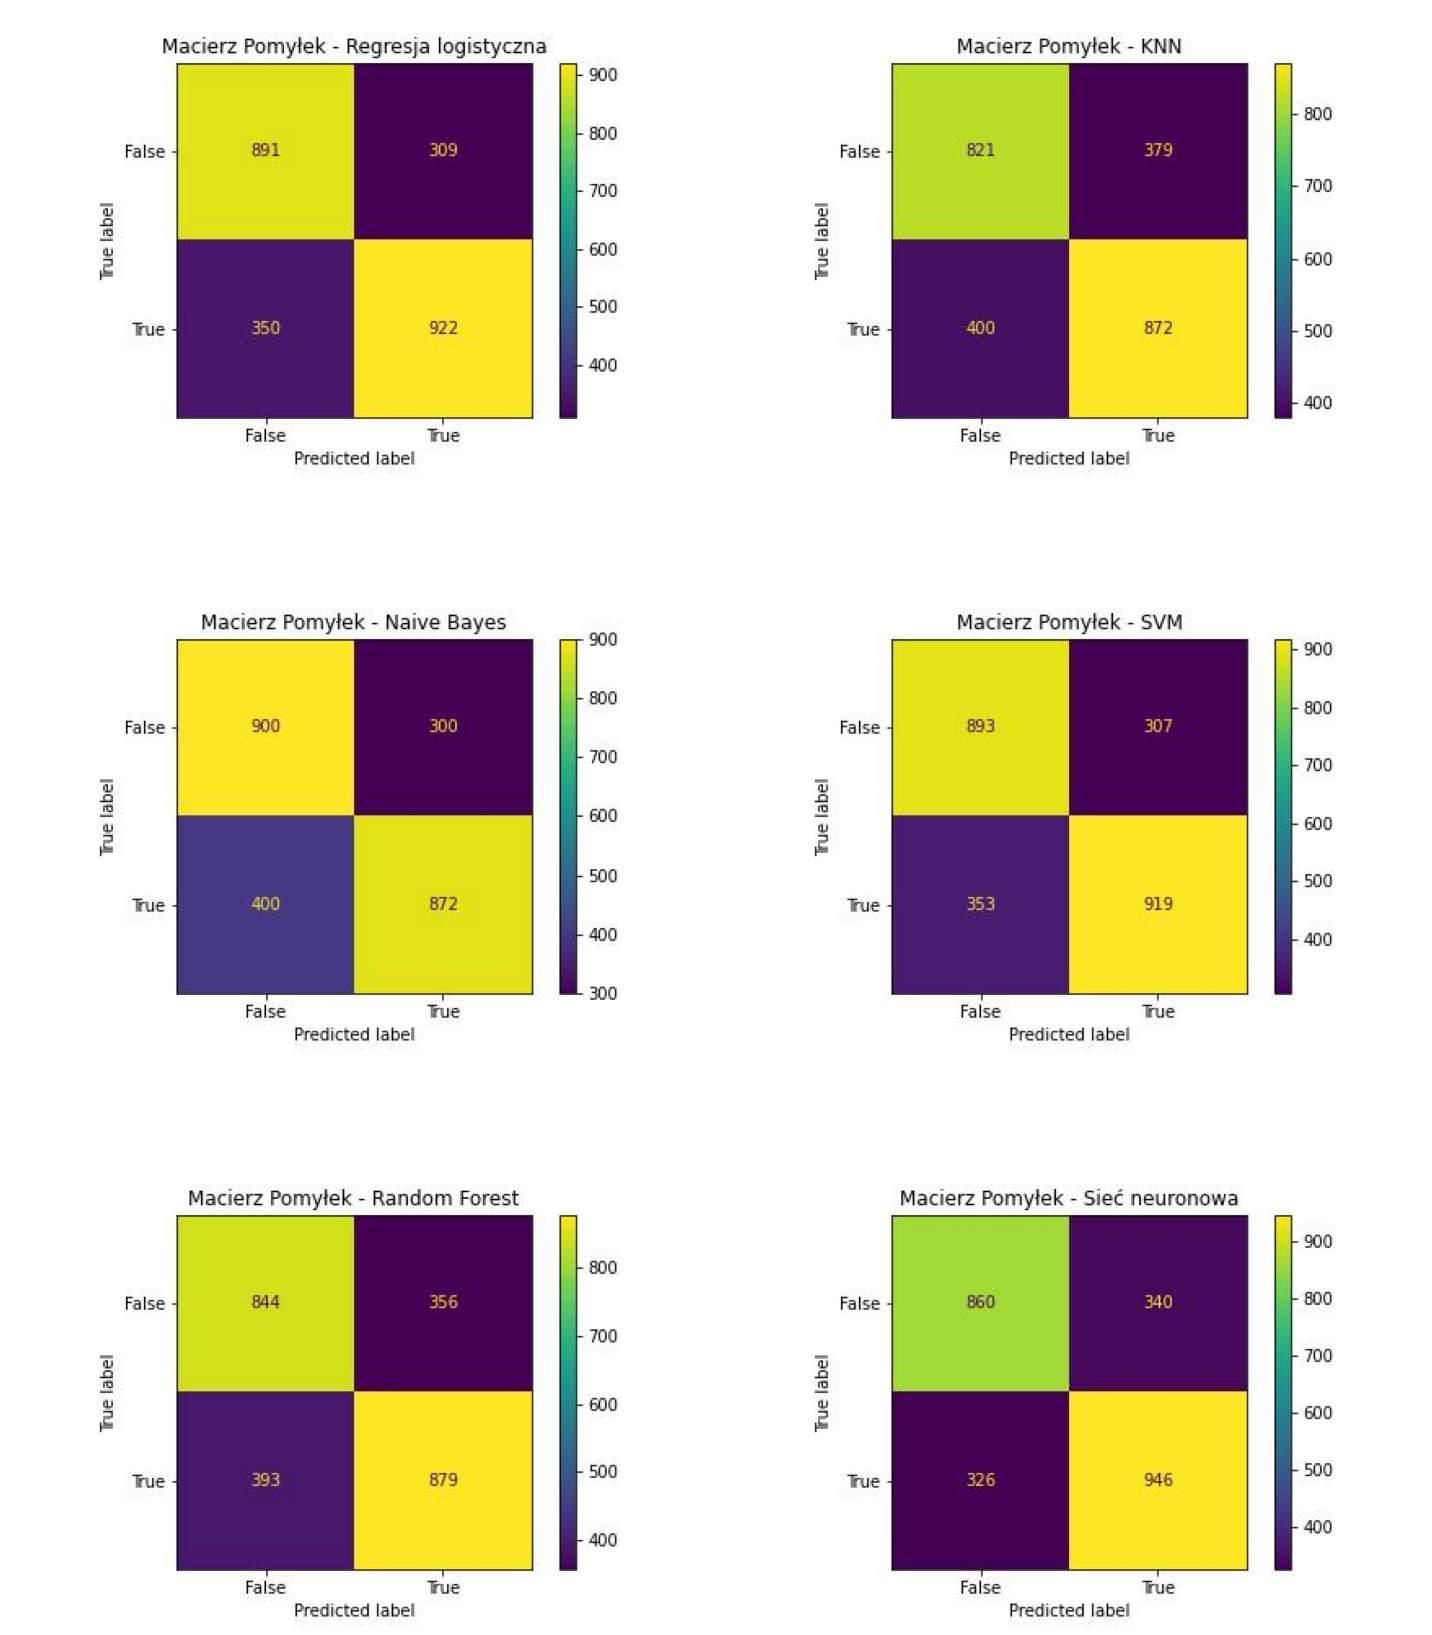

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image1 = np.array(Image.open('RL_macierz_bas.jpg'))
image2 = np.array(Image.open('KNN_macierz_bas.jpg'))
image3 = np.array(Image.open('NB_macierz_bas.jpg'))
image4 = np.array(Image.open('SVM_macierz_bas.jpg'))
image5 = np.array(Image.open('RF_macierz_bas.jpg'))
image6 = np.array(Image.open('NN_macierz_bas.jpg'))

fig, axs = plt.subplots(3, 2, figsize=(20, 25))

axs[0, 0].imshow(image1)
axs[0, 0].axis('off')  

axs[0, 1].imshow(image2)
axs[0, 1].axis('off')  

axs[1, 0].imshow(image3)
axs[1, 0].axis('off')  

axs[1, 1].imshow(image4)
axs[1, 1].axis('off') 

axs[2, 0].imshow(image5)
axs[2, 0].axis('off') 

axs[2, 1].imshow(image6)
axs[2, 1].axis('off')  

plt.tight_layout()
plt.savefig("macierze1.jpg")

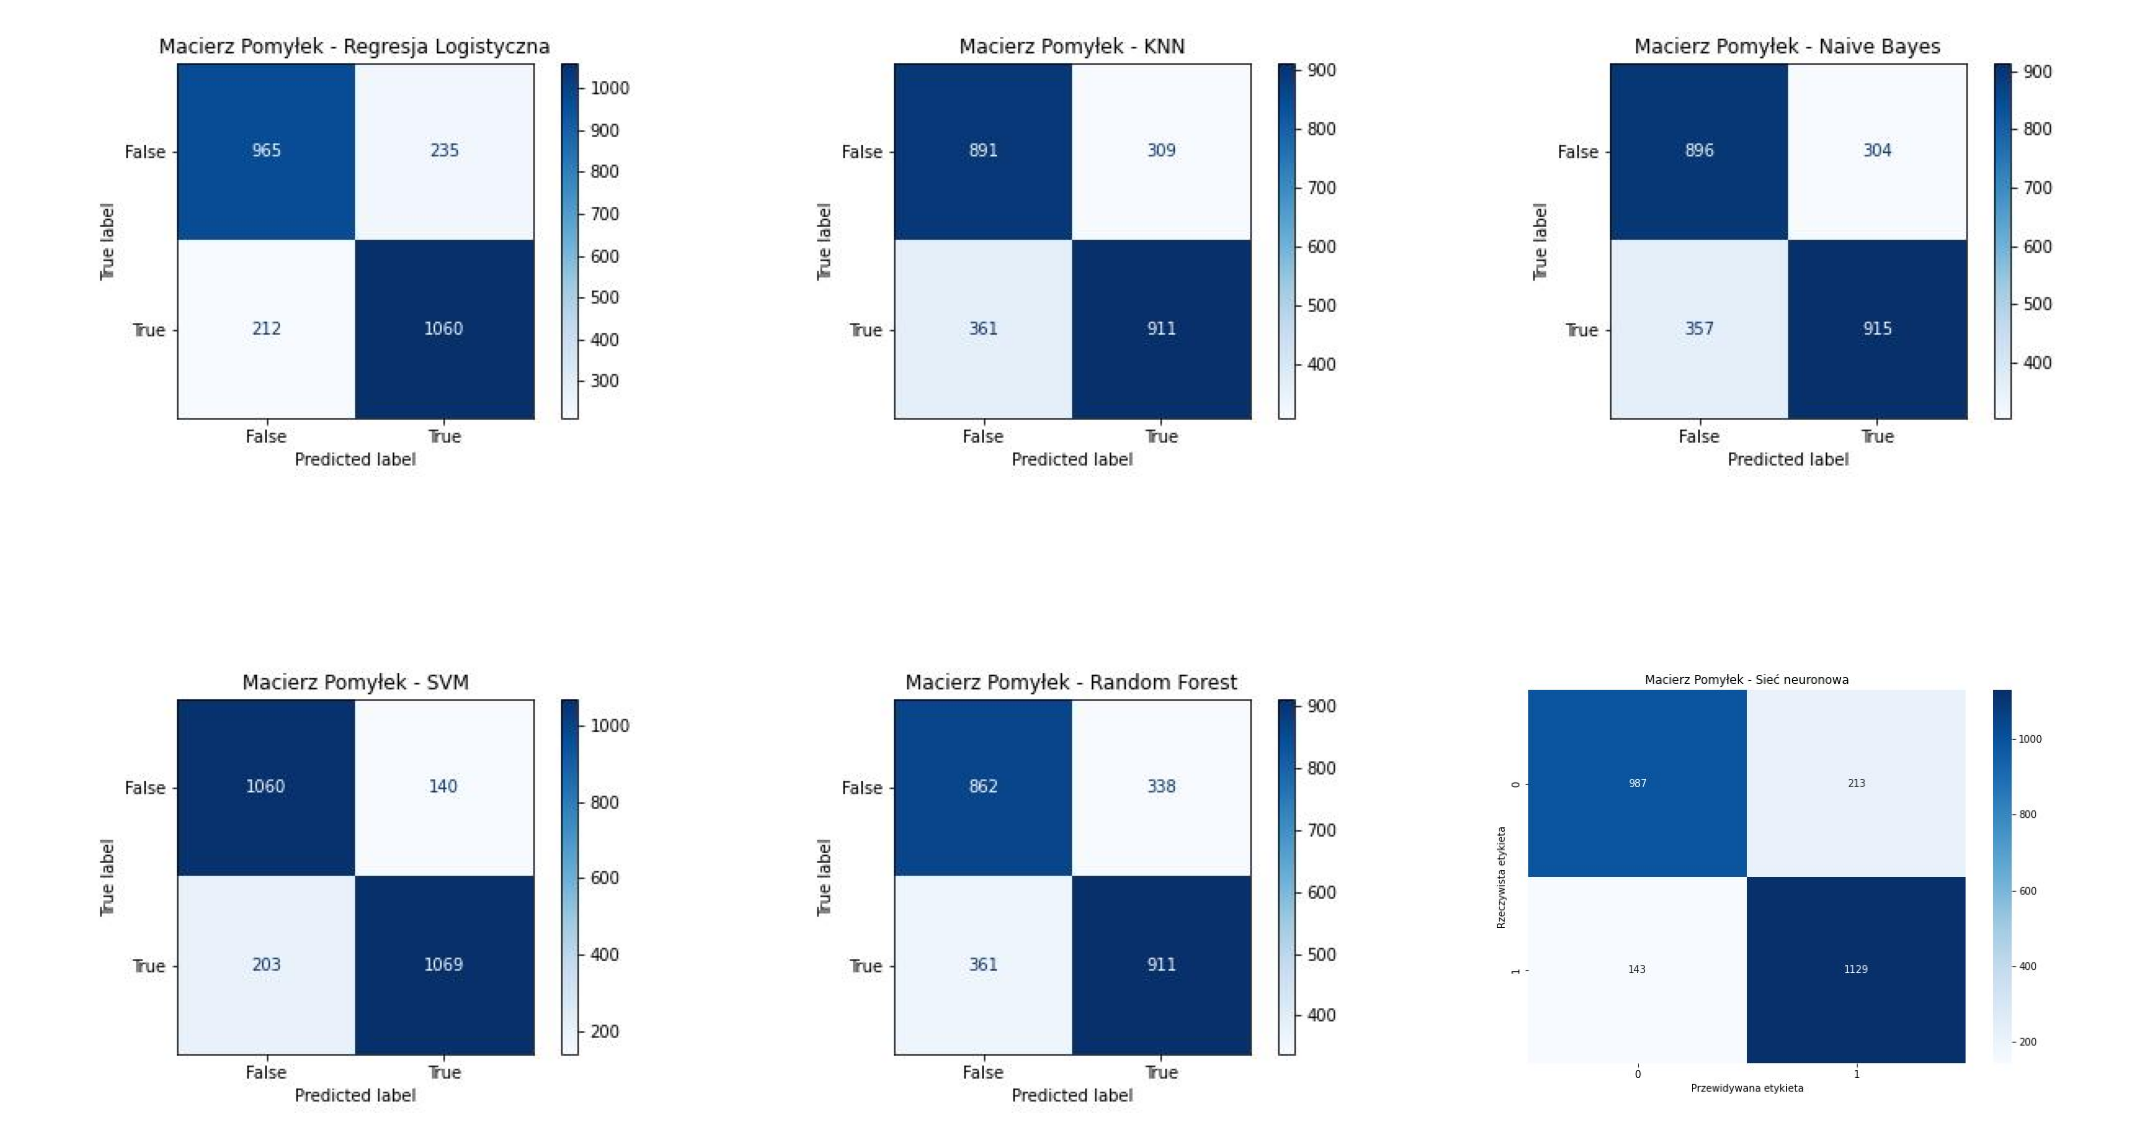

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


image1 = np.array(Image.open('RL_tuning.jpg'))
image2 = np.array(Image.open('KNN_tuning.jpg'))
image3 = np.array(Image.open('NB_tuning.jpg'))
image4 = np.array(Image.open('SVM_tuning.jpg'))
image5 = np.array(Image.open('RandomForest_tuning.jpg'))
image6 = np.array(Image.open('NN_tuning.jpg'))


fig, axs = plt.subplots(2, 3, figsize=(30, 20))


axs[0, 0].imshow(image1)
axs[0, 0].axis('off')  
# axs[0, 0].set_title('Obraz 1')

axs[0, 1].imshow(image2)
axs[0, 1].axis('off') 
# axs[0, 1].set_title('Obraz 2')

axs[0, 2].imshow(image3)
axs[0, 2].axis('off')  
# axs[0, 2].set_title('Obraz 3')

axs[1, 0].imshow(image4)
axs[1, 0].axis('off') 
# axs[1, 0].set_title('Obraz 4')

axs[1, 1].imshow(image5)
axs[1, 1].axis('off')  
# axs[1, 1].set_title('Obraz 5')

axs[1, 2].imshow(image6)
axs[1, 2].axis('off')  
# axs[1, 2].set_title('Obraz 6')

plt.tight_layout()
plt.savefig("macierzet.jpg")

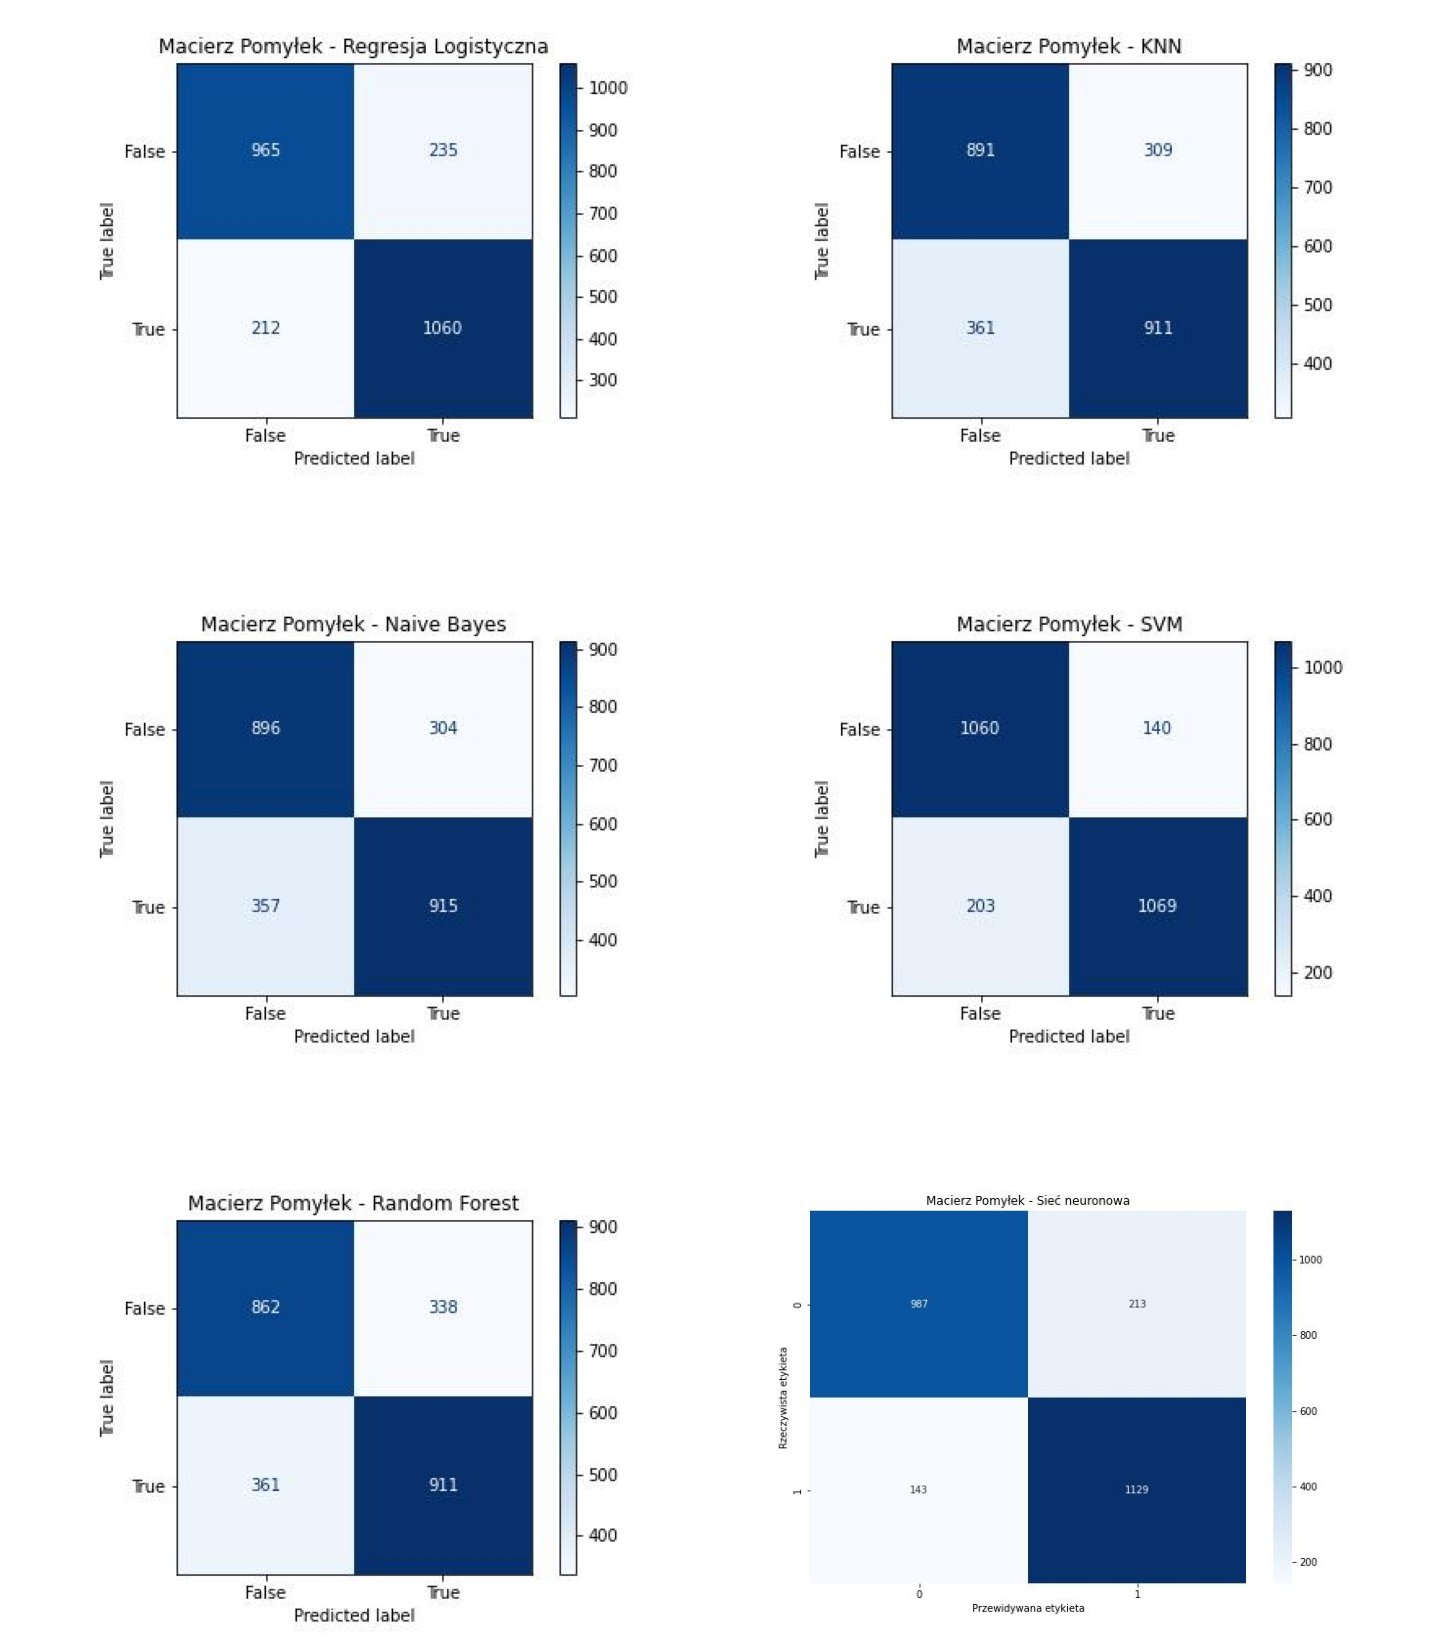

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image1 = np.array(Image.open('RL_tuning.jpg'))
image2 = np.array(Image.open('KNN_tuning.jpg'))
image3 = np.array(Image.open('NB_tuning.jpg'))
image4 = np.array(Image.open('SVM_tuning.jpg'))
image5 = np.array(Image.open('RandomForest_tuning.jpg'))
image6 = np.array(Image.open('NN_tuning.jpg'))

fig, axs = plt.subplots(3, 2, figsize=(20, 25))

axs[0, 0].imshow(image1)
axs[0, 0].axis('off')  

axs[0, 1].imshow(image2)
axs[0, 1].axis('off') 

axs[1, 0].imshow(image3)
axs[1, 0].axis('off') 

axs[1, 1].imshow(image4)
axs[1, 1].axis('off')  

axs[2, 0].imshow(image5)
axs[2, 0].axis('off') 

axs[2, 1].imshow(image6)
axs[2, 1].axis('off')  


plt.tight_layout()

plt.savefig("macierzet.jpg", dpi=300) 

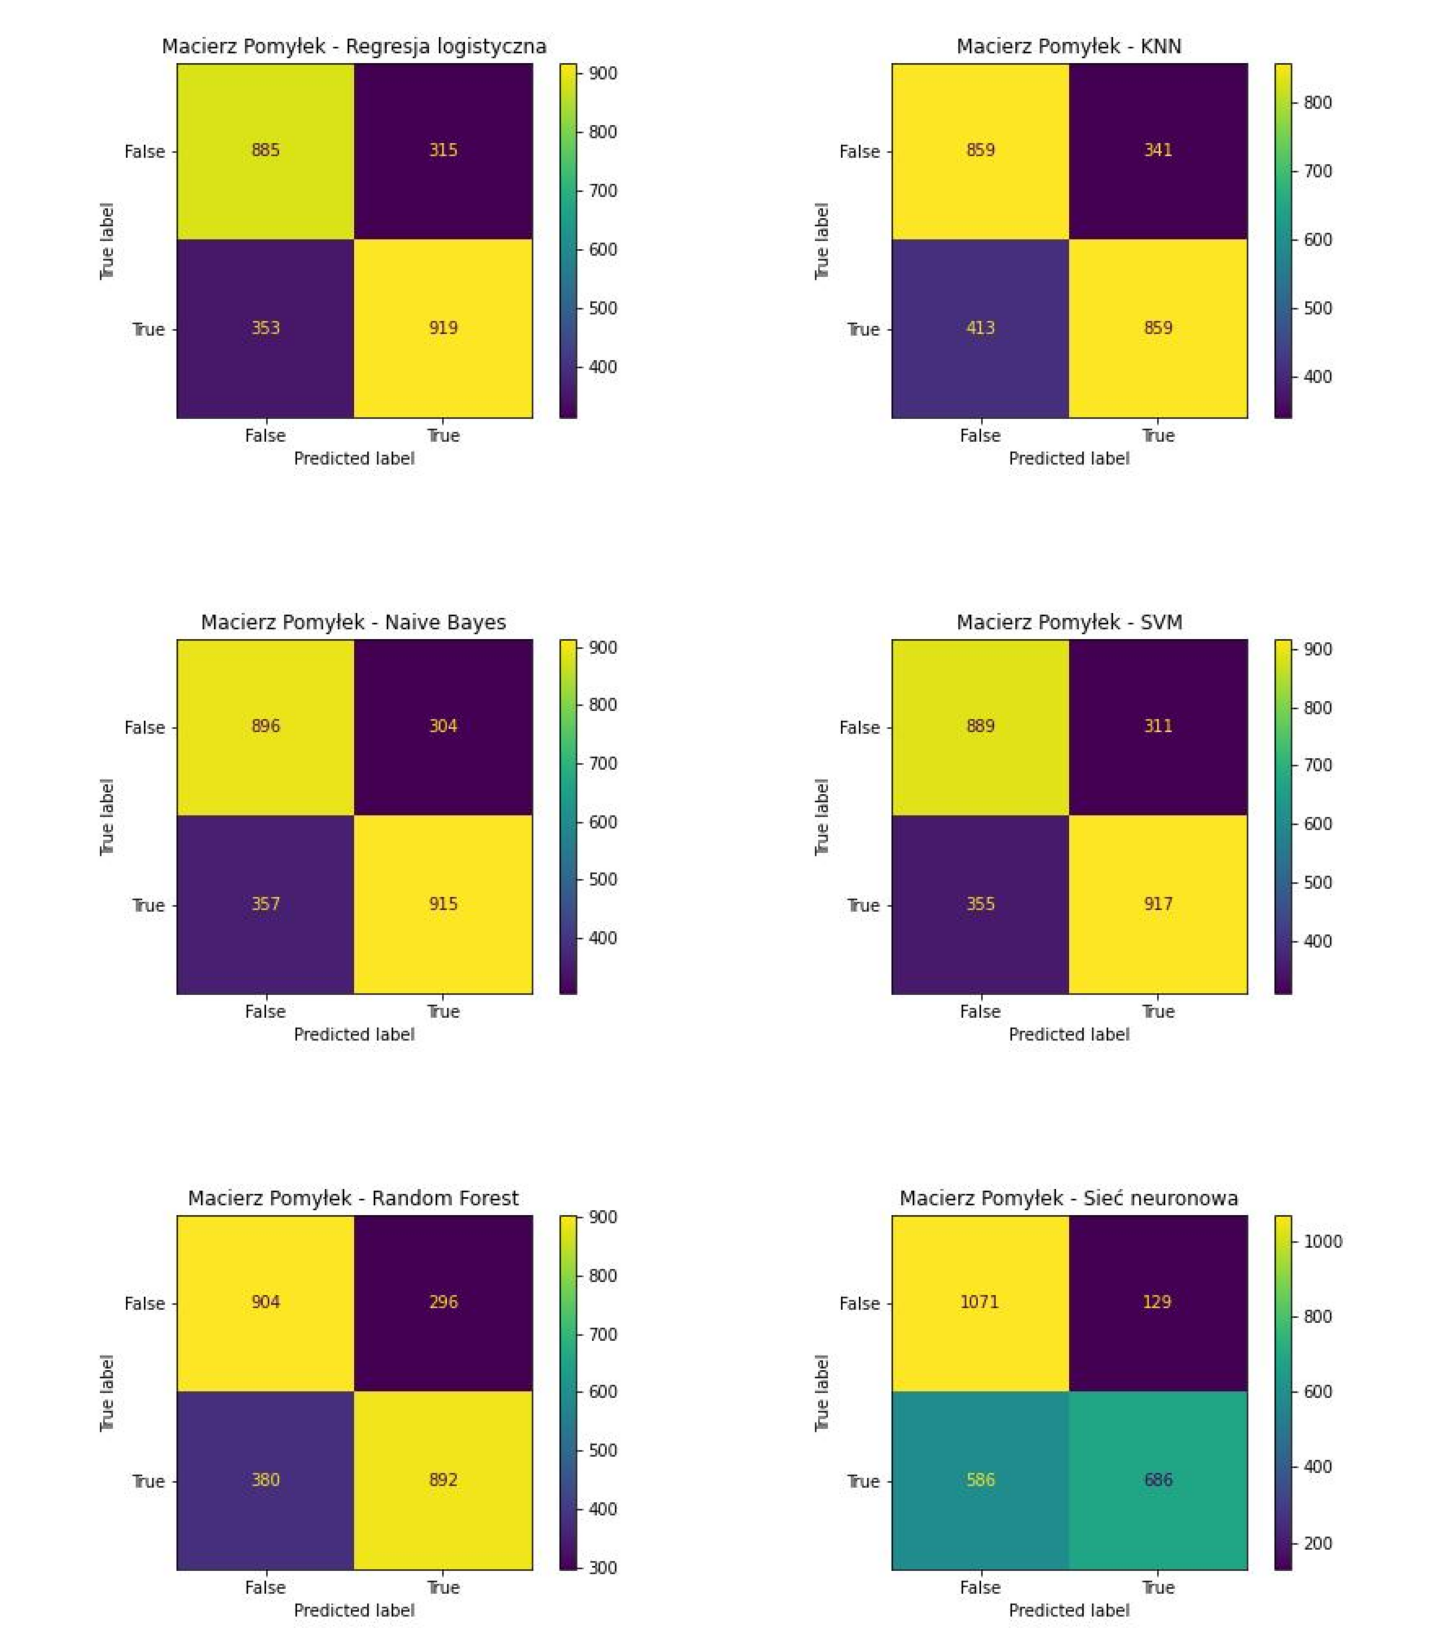

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


image1 = np.array(Image.open('RL_macierz_adv.jpg'))
image2 = np.array(Image.open('KNN_macierz_adv.jpg'))
image3 = np.array(Image.open('NB_macierz_adv.jpg'))
image4 = np.array(Image.open('SVM_macierz_adv.jpg'))
image5 = np.array(Image.open('RF_macierz_adv.jpg'))
image6 = np.array(Image.open('NN_macierz_adv.jpg'))


fig, axs = plt.subplots(3, 2, figsize=(20, 25))


axs[0, 0].imshow(image1)
axs[0, 0].axis('off')  

axs[0, 1].imshow(image2)
axs[0, 1].axis('off')  

axs[1, 0].imshow(image3)
axs[1, 0].axis('off')  

axs[1, 1].imshow(image4)
axs[1, 1].axis('off')  

axs[2, 0].imshow(image5)
axs[2, 0].axis('off')

axs[2, 1].imshow(image6)
axs[2, 1].axis('off')  

plt.tight_layout()
plt.savefig("macierze2.jpg")

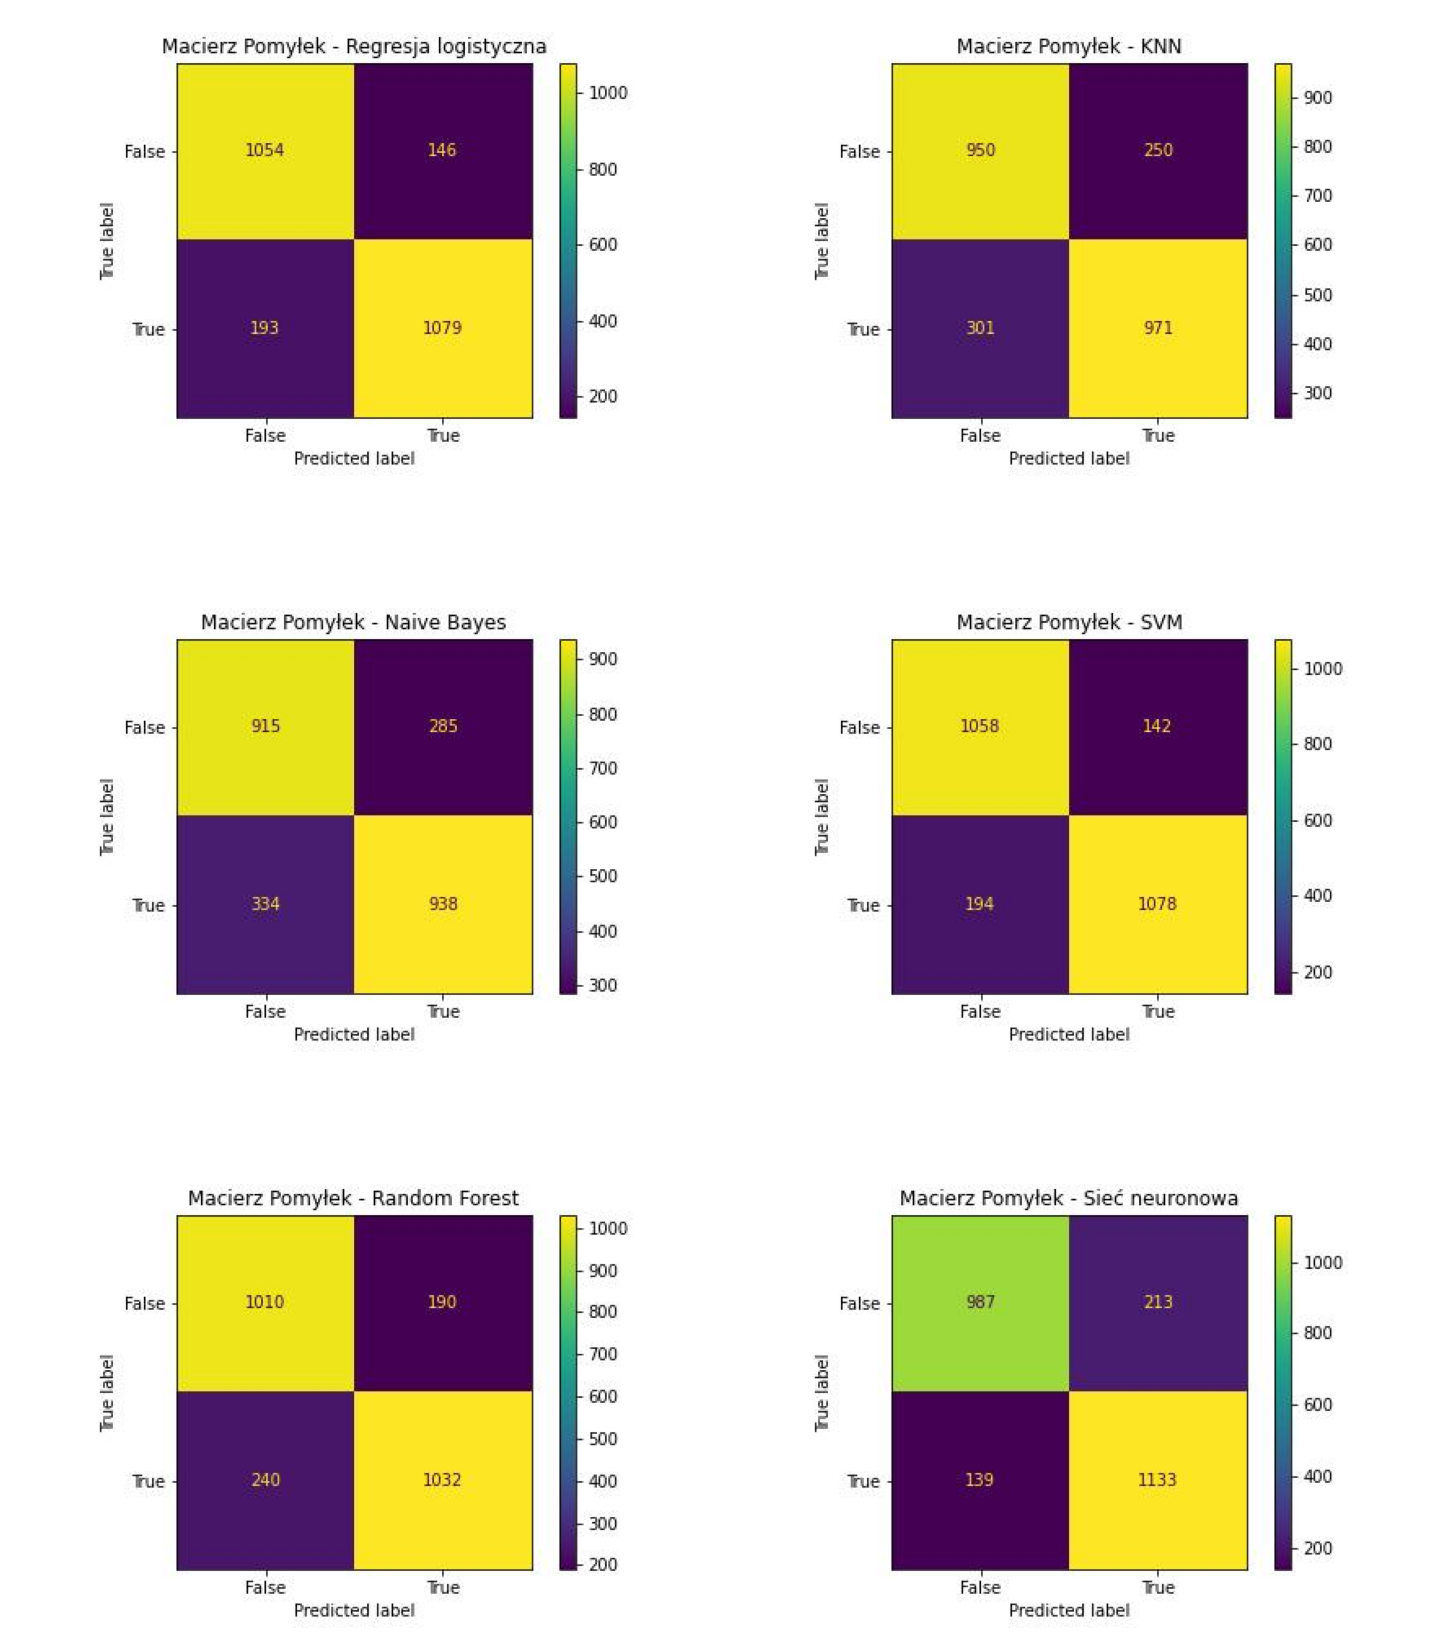

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image1 = np.array(Image.open('RL_macierz_combo.jpg'))
image2 = np.array(Image.open('KNN_macierz_combo.jpg'))
image3 = np.array(Image.open('NB_macierz_combo.jpg'))
image4 = np.array(Image.open('SVM_macierz_combo.jpg'))
image5 = np.array(Image.open('RF_macierz_combo.jpg'))
image6 = np.array(Image.open('NN_macierz_combo.jpg'))

fig, axs = plt.subplots(3, 2, figsize=(20, 25))

axs[0, 0].imshow(image1)
axs[0, 0].axis('off')  

axs[0, 1].imshow(image2)
axs[0, 1].axis('off') 

axs[1, 0].imshow(image3)
axs[1, 0].axis('off')  

axs[1, 1].imshow(image4)
axs[1, 1].axis('off')  

axs[2, 0].imshow(image5)
axs[2, 0].axis('off') 

axs[2, 1].imshow(image6)
axs[2, 1].axis('off') 

plt.tight_layout()
plt.savefig("macierze3.jpg")

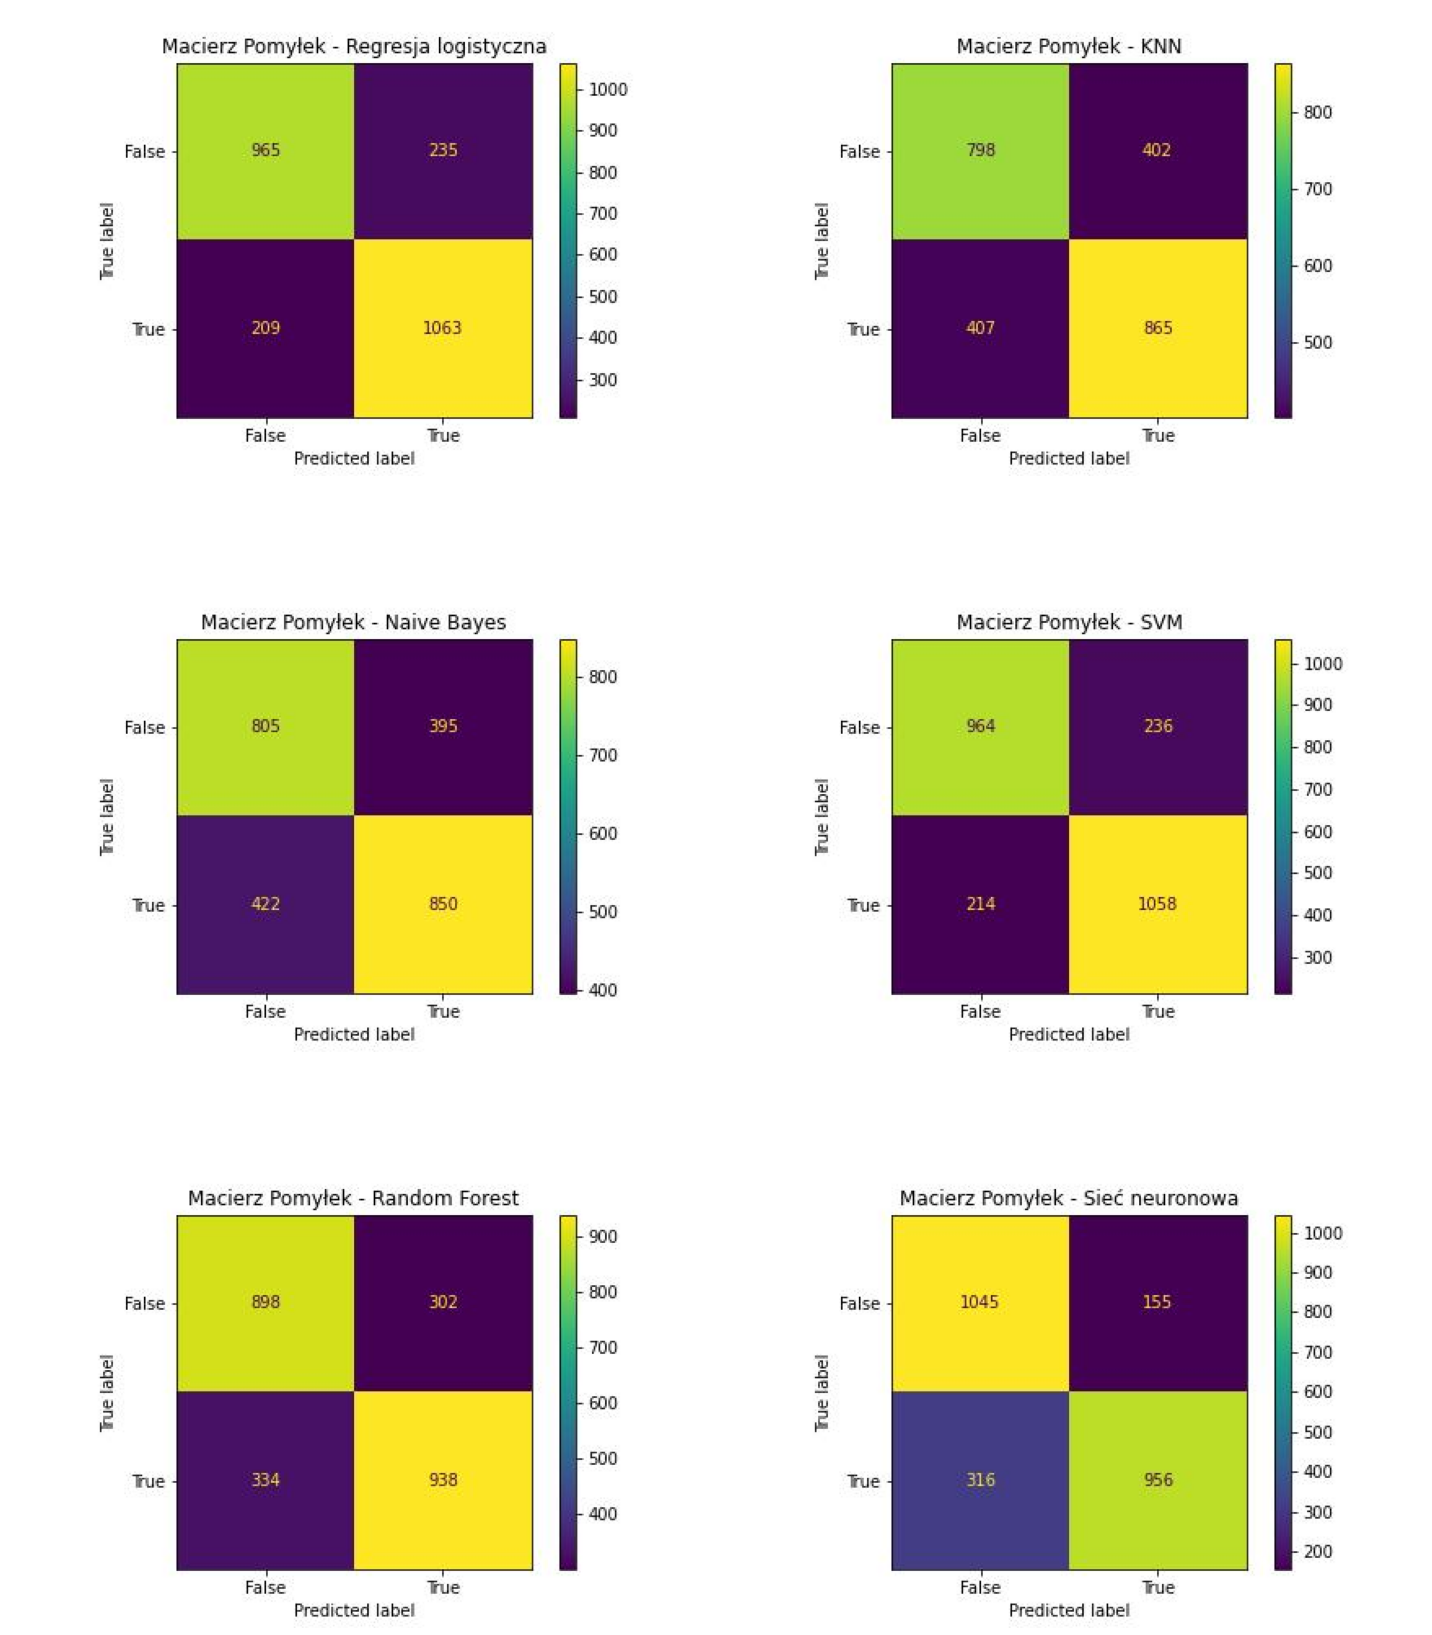

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image1 = np.array(Image.open('RL_macierz_pca.jpg'))
image2 = np.array(Image.open('KNN_macierz_pca.jpg'))
image3 = np.array(Image.open('NB_macierz_pca3.jpg'))
image4 = np.array(Image.open('SVM_macierz_pca.jpg'))
image5 = np.array(Image.open('RF_macierz_pca.jpg'))
image6 = np.array(Image.open('NN_macierz_pca.jpg'))

fig, axs = plt.subplots(3, 2, figsize=(20, 25))

axs[0, 0].imshow(image1)
axs[0, 0].axis('off') 

axs[0, 1].imshow(image2)
axs[0, 1].axis('off')  

axs[1, 0].imshow(image3)
axs[1, 0].axis('off')  

axs[1, 1].imshow(image4)
axs[1, 1].axis('off')  

axs[2, 0].imshow(image5)
axs[2, 0].axis('off')  

axs[2, 1].imshow(image6)
axs[2, 1].axis('off')  

plt.tight_layout()
plt.savefig("macierze4.jpg")

## Regresja logistyczna macierze pomyłek

Dokładność modelu (test): 0.7334142394822006
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.75      0.72      0.74      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



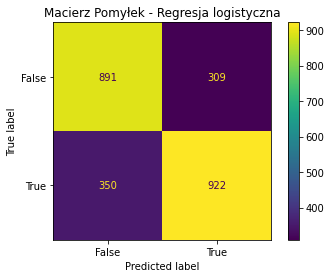

Dokładność modelu (test): 0.7297734627831716
              precision    recall  f1-score   support

       False       0.71      0.74      0.73      1200
        True       0.74      0.72      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



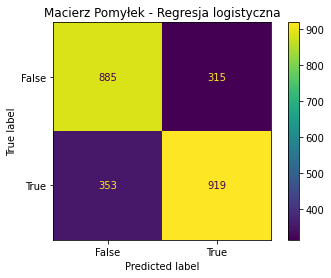

Dokładność modelu (test): 0.8628640776699029
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      1200
        True       0.88      0.85      0.86      1272

    accuracy                           0.86      2472
   macro avg       0.86      0.86      0.86      2472
weighted avg       0.86      0.86      0.86      2472



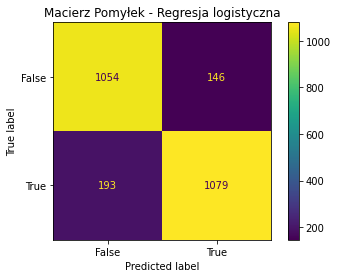

Dokładność modelu (test): 0.8203883495145631
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1200
        True       0.82      0.84      0.83      1272

    accuracy                           0.82      2472
   macro avg       0.82      0.82      0.82      2472
weighted avg       0.82      0.82      0.82      2472



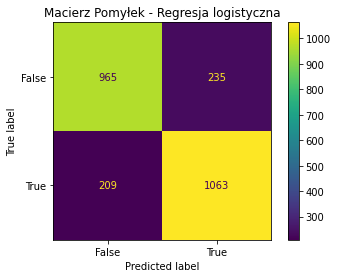

In [73]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler

cechy = df[["pts", "fg", "ast", "trb", "stl", "blk", "tov"]]
zmienna_zalezna = df['won']

model = LogisticRegression(solver='liblinear')

def process_data_and_plot(cechy, zmienna_zalezna, nazwa_pliku):
    cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

    scaler = StandardScaler()
    cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
    cechy_testowe_scaled = scaler.transform(cechy_testowe)

    model.fit(cechy_treningowe_scaled, zmienna_treningowa)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    predykcje = cross_val_predict(model, cechy_treningowe_scaled, zmienna_treningowa, cv=cv, method='predict')
    predykcje_proba = cross_val_predict(model, cechy_treningowe_scaled, zmienna_treningowa, cv=cv, method='predict_proba')[:, 1]

    predykcje_testowe = model.predict(cechy_testowe_scaled)
    dokladnosc = accuracy_score(zmienna_testowa, predykcje_testowe)
    print(f"Dokładność modelu (test): {dokladnosc}")
    print(classification_report(zmienna_testowa, predykcje_testowe))
    
    cm = confusion_matrix(zmienna_testowa, predykcje_testowe)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
    disp.plot()
    plt.title(f"Macierz Pomyłek - Regresja logistyczna")
    plt.savefig(f"RL_macierz_{nazwa_pliku}.jpg")
    plt.show()

process_data_and_plot(df[bas], zmienna_zalezna, "bas")
process_data_and_plot(df[adv], zmienna_zalezna, "adv")
process_data_and_plot(df[combo], zmienna_zalezna, "combo")
process_data_and_plot(df[pca3], zmienna_zalezna, "pca")

## KNN macierze pomyłek

Dokładność modelu KNN (bas): 0.6848705501618123
              precision    recall  f1-score   support

       False       0.67      0.68      0.68      1200
        True       0.70      0.69      0.69      1272

    accuracy                           0.68      2472
   macro avg       0.68      0.68      0.68      2472
weighted avg       0.69      0.68      0.68      2472



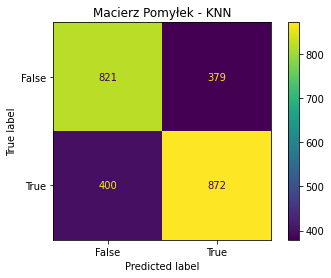

Dokładność modelu KNN (adv): 0.6949838187702265
              precision    recall  f1-score   support

       False       0.68      0.72      0.69      1200
        True       0.72      0.68      0.69      1272

    accuracy                           0.69      2472
   macro avg       0.70      0.70      0.69      2472
weighted avg       0.70      0.69      0.69      2472



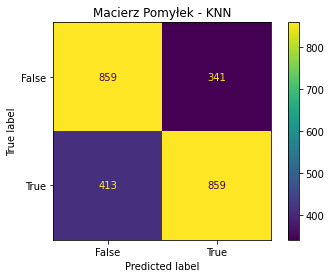

Dokładność modelu KNN (combo): 0.7771035598705501
              precision    recall  f1-score   support

       False       0.76      0.79      0.78      1200
        True       0.80      0.76      0.78      1272

    accuracy                           0.78      2472
   macro avg       0.78      0.78      0.78      2472
weighted avg       0.78      0.78      0.78      2472



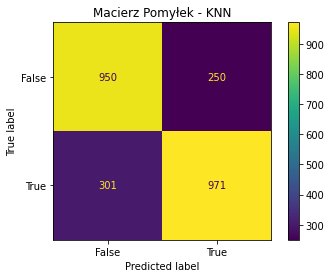

Dokładność modelu KNN (pca): 0.6727346278317152
              precision    recall  f1-score   support

       False       0.66      0.67      0.66      1200
        True       0.68      0.68      0.68      1272

    accuracy                           0.67      2472
   macro avg       0.67      0.67      0.67      2472
weighted avg       0.67      0.67      0.67      2472



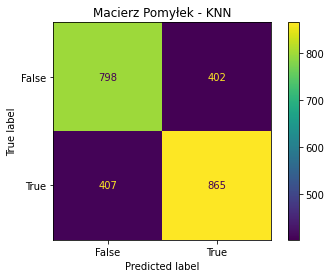

In [75]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler



cechy_KNN = df[adv] 
zmienna_zalezna_KNN = df['won'] 


model_knn = KNeighborsClassifier(n_neighbors=5)

def process_data_and_plot(cechy, nazwa_pliku):
    cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

    scaler = StandardScaler()
    cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
    cechy_testowe_scaled = scaler.transform(cechy_testowe)

    model_knn.fit(cechy_treningowe_scaled, zmienna_treningowa)

    prognozy_knn = model_knn.predict(cechy_testowe_scaled)
    dokladnosc_knn = accuracy_score(zmienna_testowa, prognozy_knn)

    print(f"Dokładność modelu KNN ({nazwa_pliku}):", dokladnosc_knn)
    print(classification_report(zmienna_testowa, prognozy_knn))
    
    cm = confusion_matrix(zmienna_testowa, prognozy_knn)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna_KNN))
    disp.plot()
    plt.title(f"Macierz Pomyłek - KNN")
    plt.savefig(f"KNN_macierz_{nazwa_pliku}.jpg")
    plt.show()

process_data_and_plot(df[bas], "bas")
process_data_and_plot(df[adv], "adv")
process_data_and_plot(df[combo], "combo")
process_data_and_plot(df[pca3], "pca")

## NB macierze pomyłek

Dokładność modelu Naive Bayes (cechy): 0.7168284789644013
Czas:  0.014959573745727539
              precision    recall  f1-score   support

       False       0.69      0.75      0.72      1200
        True       0.74      0.69      0.71      1272

    accuracy                           0.72      2472
   macro avg       0.72      0.72      0.72      2472
weighted avg       0.72      0.72      0.72      2472



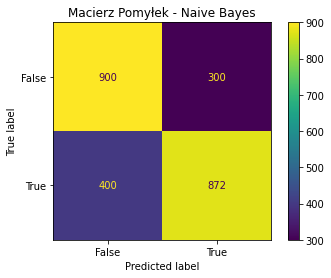

Dokładność modelu Naive Bayes (adv): 0.7326051779935275


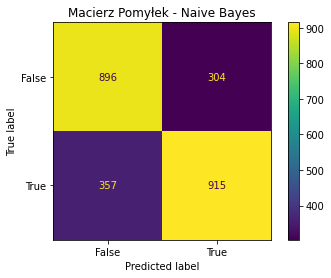

Dokładność modelu Naive Bayes (combo): 0.7495954692556634


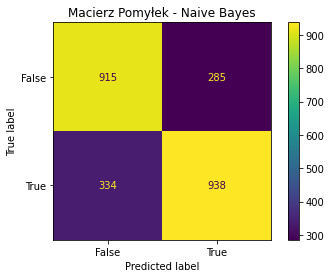

Dokładność modelu Naive Bayes (pca3): 0.6694983818770227


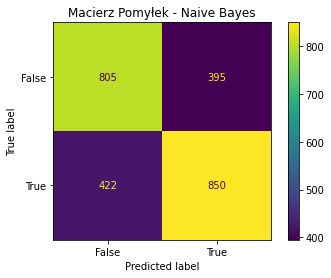

In [8]:
import time
import numpy as np
import pandas as pd  # Przykładowe importowanie danych
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

start_time = time.time()

cechy = df[bas]
cechy1 = df[adv]
cechy3 = df[combo]
cechy4 = df[pca3]
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)

prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
end_time = time.time()
czas = end_time - start_time

print("Dokładność modelu Naive Bayes (cechy):", dokladnosc_nb)
print("Czas: ", czas)
print(classification_report(zmienna_testowa, prognozy_nb))

cm = confusion_matrix(zmienna_testowa, prognozy_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
disp.plot()
plt.title("Macierz Pomyłek - Naive Bayes")
plt.savefig("NB_macierz_bas.jpg")
plt.show()

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy1, zmienna_zalezna, test_size=0.25, random_state=0)
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)
prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
print("Dokładność modelu Naive Bayes (adv):", dokladnosc_nb)
cm = confusion_matrix(zmienna_testowa, prognozy_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
disp.plot()
plt.title("Macierz Pomyłek - Naive Bayes")
plt.savefig("NB_macierz_adv.jpg")
plt.show()

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy3, zmienna_zalezna, test_size=0.25, random_state=0)
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)
prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
print("Dokładność modelu Naive Bayes (combo):", dokladnosc_nb)
cm = confusion_matrix(zmienna_testowa, prognozy_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
disp.plot()
plt.title("Macierz Pomyłek - Naive Bayes")
plt.savefig("NB_macierz_combo.jpg")
plt.show()

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy4, zmienna_zalezna, test_size=0.25, random_state=0)
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)
model_nb.fit(cechy_treningowe_scaled, zmienna_treningowa)
prognozy_nb = model_nb.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
print("Dokładność modelu Naive Bayes (pca3):", dokladnosc_nb)
cm = confusion_matrix(zmienna_testowa, prognozy_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
disp.plot()
plt.title("Macierz Pomyłek - Naive Bayes")
plt.savefig("NB_macierz_pca3.jpg")
plt.show()

## SVM macierze pomyłek

Dokładność modelu SVM (bas): 0.7330097087378641
              precision    recall  f1-score   support

       False       0.72      0.74      0.73      1200
        True       0.75      0.72      0.74      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



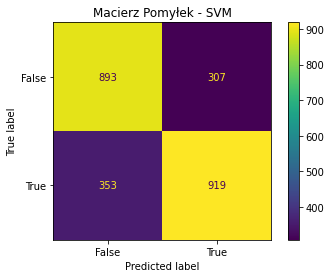

Dokładność modelu SVM (adv): 0.7305825242718447
              precision    recall  f1-score   support

       False       0.71      0.74      0.73      1200
        True       0.75      0.72      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



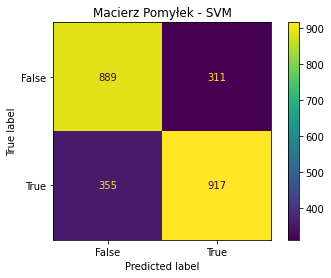

Dokładność modelu SVM (combo): 0.8640776699029126
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      1200
        True       0.88      0.85      0.87      1272

    accuracy                           0.86      2472
   macro avg       0.86      0.86      0.86      2472
weighted avg       0.86      0.86      0.86      2472



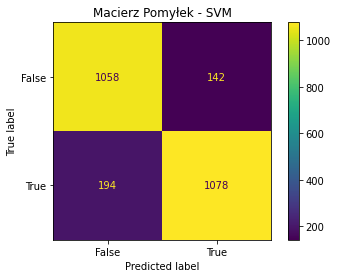

Dokładność modelu SVM (pca): 0.8179611650485437
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1200
        True       0.82      0.83      0.82      1272

    accuracy                           0.82      2472
   macro avg       0.82      0.82      0.82      2472
weighted avg       0.82      0.82      0.82      2472



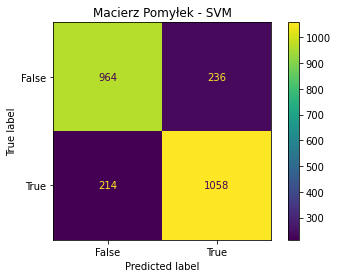

In [77]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cechy_SVM = df[pca2]  # Zmienne niezależne
zmienna_zalezna_SVM = df['won']  # Zmienna zależna (wygrana lub przegrana)

model_svm = SVC(kernel='linear')

def process_data_and_plot(cechy, zmienna_zalezna, nazwa_pliku):
    cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

    scaler = StandardScaler()
    cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
    cechy_testowe_scaled = scaler.transform(cechy_testowe)

    model_svm.fit(cechy_treningowe_scaled, zmienna_treningowa)

    prognozy_svm = model_svm.predict(cechy_testowe_scaled)
    dokladnosc_svm = accuracy_score(zmienna_testowa, prognozy_svm)
    print(f"Dokładność modelu SVM ({nazwa_pliku}):", dokladnosc_svm)
    print(classification_report(zmienna_testowa, prognozy_svm))
    
    cm = confusion_matrix(zmienna_testowa, prognozy_svm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
    disp.plot()
    plt.title(f"Macierz Pomyłek - SVM")
    plt.savefig(f"SVM_macierz_{nazwa_pliku}.jpg")
    plt.show()

process_data_and_plot(df[bas], zmienna_zalezna_SVM, "bas")
process_data_and_plot(df[adv], zmienna_zalezna_SVM, "adv")
process_data_and_plot(df[combo], zmienna_zalezna_SVM, "combo")
process_data_and_plot(df[pca3], zmienna_zalezna_SVM, "pca")

## LL macierze pomyłek

Dokładność modelu Random Forest (bas): 0.6970064724919094
              precision    recall  f1-score   support

       False       0.68      0.70      0.69      1200
        True       0.71      0.69      0.70      1272

    accuracy                           0.70      2472
   macro avg       0.70      0.70      0.70      2472
weighted avg       0.70      0.70      0.70      2472



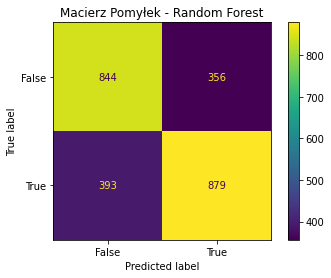

Dokładność modelu Random Forest (adv): 0.7265372168284789
              precision    recall  f1-score   support

       False       0.70      0.75      0.73      1200
        True       0.75      0.70      0.73      1272

    accuracy                           0.73      2472
   macro avg       0.73      0.73      0.73      2472
weighted avg       0.73      0.73      0.73      2472



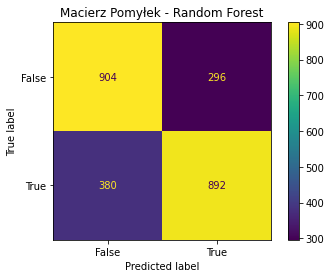

Dokładność modelu Random Forest (combo): 0.8260517799352751
              precision    recall  f1-score   support

       False       0.81      0.84      0.82      1200
        True       0.84      0.81      0.83      1272

    accuracy                           0.83      2472
   macro avg       0.83      0.83      0.83      2472
weighted avg       0.83      0.83      0.83      2472



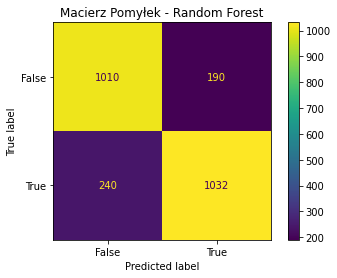

Dokładność modelu Random Forest (pca): 0.7427184466019418
              precision    recall  f1-score   support

       False       0.73      0.75      0.74      1200
        True       0.76      0.74      0.75      1272

    accuracy                           0.74      2472
   macro avg       0.74      0.74      0.74      2472
weighted avg       0.74      0.74      0.74      2472



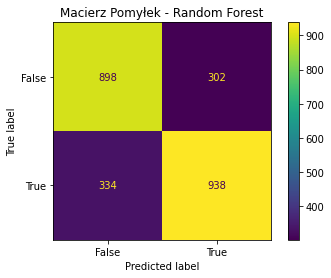

In [78]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def process_data_and_plot_rf(cechy, zmienna_zalezna, nazwa_pliku):
    cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

    model_rf = RandomForestClassifier(n_estimators=100, random_state=0)  

    model_rf.fit(cechy_treningowe, zmienna_treningowa)

    prognozy_rf = model_rf.predict(cechy_testowe)
    dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
    print(f"Dokładność modelu Random Forest ({nazwa_pliku}):", dokladnosc_rf)
    print(classification_report(zmienna_testowa, prognozy_rf))

    cm = confusion_matrix(zmienna_testowa, prognozy_rf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(zmienna_zalezna))
    disp.plot()
    plt.title(f"Macierz Pomyłek - Random Forest")
    plt.savefig(f"RF_macierz_{nazwa_pliku}.jpg")
    plt.show()

process_data_and_plot_rf(df[bas], df['won'], "bas")
process_data_and_plot_rf(df[adv], df['won'], "adv")
process_data_and_plot_rf(df[combo], df['won'], "combo")
process_data_and_plot_rf(df[pca3], df['won'], "pca")

## Sieci neuronowe macierze pomyłek

Epoch 100/1000 - Loss: 0.18266194247162534
Epoch 200/1000 - Loss: 0.20958866903951612
Epoch 300/1000 - Loss: 0.20928755487013437
Epoch 400/1000 - Loss: 0.2081113405667424
Epoch 500/1000 - Loss: 0.2059719381986068
Epoch 600/1000 - Loss: 0.2041516062352408
Epoch 700/1000 - Loss: 0.18297007562907971
Epoch 800/1000 - Loss: 0.22742870962934983
Epoch 900/1000 - Loss: 0.1927760358140229
Epoch 1000/1000 - Loss: 0.18439280944213166
Dokładność modelu (bas): 0.7305825242718447


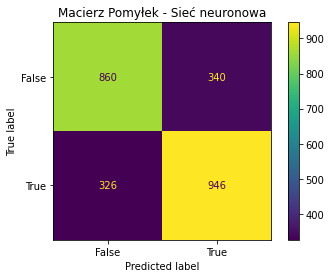

Epoch 100/1000 - Loss: 0.20462846455336514
Epoch 200/1000 - Loss: 0.20506304037700687
Epoch 300/1000 - Loss: 0.20501442271636905
Epoch 400/1000 - Loss: 0.20481115416582507
Epoch 500/1000 - Loss: 0.20456085537744753
Epoch 600/1000 - Loss: 0.20432071475502522
Epoch 700/1000 - Loss: 0.20412887349810574
Epoch 800/1000 - Loss: 0.20398275481904837
Epoch 900/1000 - Loss: 0.203868185892009
Epoch 1000/1000 - Loss: 0.2037736921530111
Dokładność modelu (adv): 0.7107605177993528


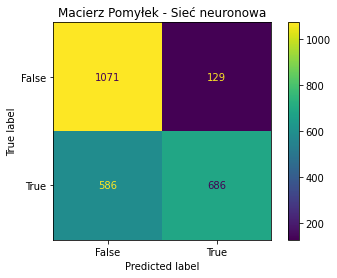

Epoch 100/1000 - Loss: 0.113482895370588
Epoch 200/1000 - Loss: 0.1107784464510547
Epoch 300/1000 - Loss: 0.10995399719596047
Epoch 400/1000 - Loss: 0.10902508893413654
Epoch 500/1000 - Loss: 0.10821652231456273
Epoch 600/1000 - Loss: 0.10738800748534362
Epoch 700/1000 - Loss: 0.10673228255374412
Epoch 800/1000 - Loss: 0.10618661686216767
Epoch 900/1000 - Loss: 0.10574124988121814
Epoch 1000/1000 - Loss: 0.10536388527862267
Dokładność modelu (combo): 0.8576051779935275


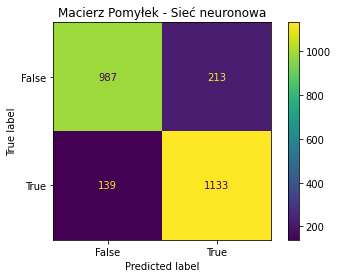

Epoch 100/1000 - Loss: 0.14769319214821042
Epoch 200/1000 - Loss: 0.13617021915830232
Epoch 300/1000 - Loss: 0.1315077061946808
Epoch 400/1000 - Loss: 0.12928576456332255
Epoch 500/1000 - Loss: 0.12761554365758396
Epoch 600/1000 - Loss: 0.12624551204657278
Epoch 700/1000 - Loss: 0.12507391167516027
Epoch 800/1000 - Loss: 0.1241500535041884
Epoch 900/1000 - Loss: 0.12340477984551947
Epoch 1000/1000 - Loss: 0.1227901249869493
Dokładność modelu (pca): 0.8094660194174758


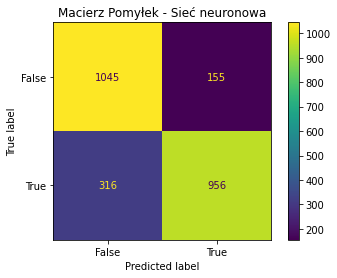

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pochodna funkcji 
def sigmoid_derivative(x):
    return x * (1 - x)


class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

def process_data_and_plot_nn(cechy, zmienna_zalezna, nazwa_pliku):
    scaler = StandardScaler()
    cechy = scaler.fit_transform(cechy)

    X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

    input_size = X_train.shape[1]
    hidden_size = 10
    output_size = 1
    epochs = 1000
    learning_rate = 0.01

    nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
    nn.train(X_train, y_train, epochs, learning_rate)

    y_pred = nn.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    accuracy = np.mean(y_pred_classes == y_test)
    print(f"Dokładność modelu ({nazwa_pliku}):", accuracy)

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
    disp.plot()
    plt.title(f"Macierz Pomyłek - Sieć neuronowa")
    plt.savefig(f"NN_macierz_{nazwa_pliku}.jpg")
    plt.show()

process_data_and_plot_nn(df[bas].values, df['won'].values.reshape(-1, 1), "bas")
process_data_and_plot_nn(df[adv].values, df['won'].values.reshape(-1, 1), "adv")
process_data_and_plot_nn(df[combo].values, df['won'].values.reshape(-1, 1), "combo")
process_data_and_plot_nn(df[pca3].values, df['won'].values.reshape(-1, 1), "pca")

## Tuning parametrów

### Regresja

c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\kowal\appdata\local\prog

Najlepsze parametry: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Dokładność modelu:  0.8628640776699029
Raport klasyfikacyjny:
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      1200
        True       0.88      0.85      0.86      1272

    accuracy                           0.86      2472
   macro avg       0.86      0.86      0.86      2472
weighted avg       0.86      0.86      0.86      2472

Czas wykonania: 106.23482775688171


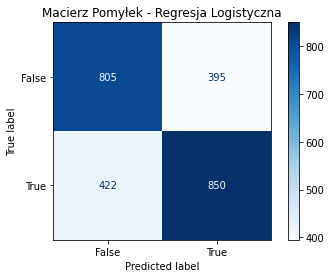

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

start_time = time.time()

cechy = df[combo]
zmienna_zalezna = df['won']

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(cechy_treningowe, zmienna_treningowa)

best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

best_model = grid_search.best_estimator_
prognozy = best_model.predict(cechy_testowe)

dokladnosc = accuracy_score(zmienna_testowa, prognozy)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Macierz Pomyłek - Regresja Logistyczna")
#plt.savefig("Rl_tuning.jpg")

raport = classification_report(zmienna_testowa, prognozy)
print("Dokładność modelu: ", dokladnosc)
print("Raport klasyfikacyjny:")
print(raport)

end_time = time.time()
czas = end_time - start_time
print("Czas wykonania:", czas)

### KNN tuning

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Najlepsze parametry:  {'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
Najlepszy wynik:  0.8030751576799771
Dokładność modelu KNN po GridSearchCV: 0.7965210355987055
              precision    recall  f1-score   support

       False       0.77      0.82      0.80      1200
        True       0.82      0.78      0.80      1272

    accuracy                           0.80      2472
   macro avg       0.80      0.80      0.80      2472
weighted avg       0.80      0.80      0.80      2472

Macierz pomyłek KNN:
[[983 217]
 [286 986]]
Czas wykonania: 99.00117325782776


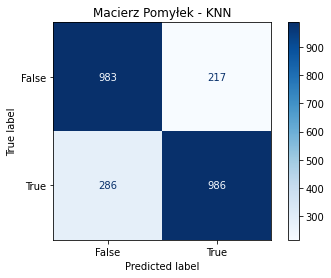

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

cechy_KNN = df[combo]   
zmienna_zalezna_KNN = df['won']  

cechy_treningowe_KNN, cechy_testowe_KNN, zmienna_treningowa_KNN, zmienna_testowa_KNN = train_test_split(cechy_KNN, zmienna_zalezna_KNN, test_size=0.25, random_state=0)

model_knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(3, 101)),  # Zakres od 3 do 100
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

start_time = time.time()
grid_search.fit(cechy_treningowe_KNN, zmienna_treningowa_KNN)
end_time = time.time()
czas = end_time - start_time

print("Najlepsze parametry: ", grid_search.best_params_)
print("Najlepszy wynik: ", grid_search.best_score_)

best_knn = grid_search.best_estimator_
prognozy_knn = best_knn.predict(cechy_testowe_KNN)
dokladnosc_knn = accuracy_score(zmienna_testowa_KNN, prognozy_knn)
print("Dokładność modelu KNN po GridSearchCV:", dokladnosc_knn)
print(classification_report(zmienna_testowa_KNN, prognozy_knn))

cm_knn = confusion_matrix(zmienna_testowa_KNN, prognozy_knn)
print("Macierz pomyłek KNN:")
print(cm_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=best_knn.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Macierz Pomyłek - KNN")
#plt.savefig("KNN_tuning.jpg")

print("Czas wykonania:", czas)

### NB tuning

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Najlepsze parametry:  {'var_smoothing': 1e-09}
Dokładność modelu Naive Bayes: 0.7495954692556634
              precision    recall  f1-score   support

       False       0.73      0.76      0.75      1200
        True       0.77      0.74      0.75      1272

    accuracy                           0.75      2472
   macro avg       0.75      0.75      0.75      2472
weighted avg       0.75      0.75      0.75      2472

Macierz pomyłek Naive Bayes:
[[915 285]
 [334 938]]


Text(0.5, 1.0, 'Macierz Pomyłek - Naive Bayes')

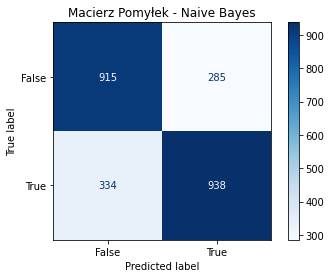

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cechy = df[combo]  
zmienna_zalezna = df['won'] 

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

scaler = StandardScaler()
cechy_treningowe_scaled = scaler.fit_transform(cechy_treningowe)
cechy_testowe_scaled = scaler.transform(cechy_testowe)

model_nb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=model_nb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(cechy_treningowe_scaled, zmienna_treningowa)

best_model = grid_search.best_estimator_

prognozy_nb = best_model.predict(cechy_testowe_scaled)
dokladnosc_nb = accuracy_score(zmienna_testowa, prognozy_nb)
print("Najlepsze parametry: ", grid_search.best_params_)
print("Dokładność modelu Naive Bayes:", dokladnosc_nb)
print(classification_report(zmienna_testowa, prognozy_nb))

cm_nb = confusion_matrix(zmienna_testowa, prognozy_nb)
print("Macierz pomyłek Naive Bayes:")
print(cm_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=best_model.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Macierz Pomyłek - Naive Bayes")
#plt.savefig("NB_tuning.jpg")

### SVM tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Najlepsze parametry:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Dokładność modelu SVM: 0.8612459546925566
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1200
        True       0.88      0.84      0.86      1272

    accuracy                           0.86      2472
   macro avg       0.86      0.86      0.86      2472
weighted avg       0.86      0.86      0.86      2472

Czas:  216.62250423431396
Macierz pomyłek SVM:
[[1059  141]
 [ 202 1070]]


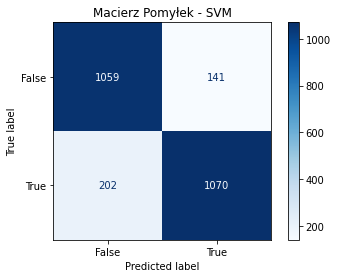

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

start_time = time.time()

cechy_SVM = df[combo]
zmienna_zalezna_SVM = df['won']

cechy_treningowe_SVM, cechy_testowe_SVM, zmienna_treningowa_SVM, zmienna_testowa_SVM = train_test_split(cechy_SVM, zmienna_zalezna_SVM, test_size=0.25, random_state=0)

model_svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    model_svm, param_grid=param_grid,
    cv=5, verbose=1, n_jobs=-1
)

grid_search.fit(cechy_treningowe_SVM, zmienna_treningowa_SVM)

best_model = grid_search.best_estimator_

prognozy_svm = best_model.predict(cechy_testowe_SVM)
dokladnosc_svm = accuracy_score(zmienna_testowa_SVM, prognozy_svm)
end_time = time.time()
czas = end_time - start_time

print("Najlepsze parametry: ", grid_search.best_params_)
print("Dokładność modelu SVM:", dokladnosc_svm)
print(classification_report(zmienna_testowa_SVM, prognozy_svm))
print("Czas: ", czas)

cm_svm = confusion_matrix(zmienna_testowa_SVM, prognozy_svm)
print("Macierz pomyłek SVM:")
print(cm_svm)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=best_model.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Macierz Pomyłek - SVM")
plt.savefig("SVM_tuning_gridsearch.jpg")

### RF tuning

Fitting 5 folds for each of 3564 candidates, totalling 17820 fits
Najlepsze parametry:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 42}
Dokładność modelu Random Forest: 0.8260517799352751
              precision    recall  f1-score   support

       False       0.80      0.85      0.83      1200
        True       0.85      0.80      0.83      1272

    accuracy                           0.83      2472
   macro avg       0.83      0.83      0.83      2472
weighted avg       0.83      0.83      0.83      2472

Macierz pomyłek Random Forest:
[[1021  179]
 [ 251 1021]]


Text(0.5, 1.0, 'Macierz Pomyłek - Random Forest')

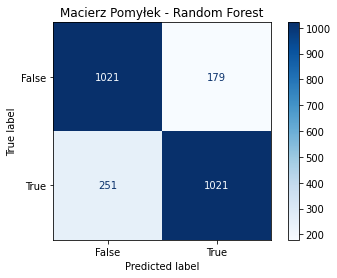

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

cechy = df[combo]  
zmienna_zalezna = df['won']  

cechy_treningowe, cechy_testowe, zmienna_treningowa, zmienna_testowa = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

param_grid = {
    'n_estimators': range(1, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(cechy_treningowe, zmienna_treningowa)

best_params = grid_search.best_params_
print("Najlepsze parametry: ", best_params)

best_rf = grid_search.best_estimator_

prognozy_rf = best_rf.predict(cechy_testowe)
dokladnosc_rf = accuracy_score(zmienna_testowa, prognozy_rf)
print("Dokładność modelu Random Forest:", dokladnosc_rf)
print(classification_report(zmienna_testowa, prognozy_rf))

cm_rf = confusion_matrix(zmienna_testowa, prognozy_rf)
print("Macierz pomyłek Random Forest:")
print(cm_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Macierz Pomyłek - Random Forest")
#plt.savefig("RandomForest_tuning.jpg")

### NN tuning

Epoch 100/500 - Loss: 0.37172644943760336
Epoch 200/500 - Loss: 0.3608698780692134
Epoch 300/500 - Loss: 0.35650571970971967
Epoch 400/500 - Loss: 0.3544611742596473
Epoch 500/500 - Loss: 0.3534561755628352
Epoch 100/500 - Loss: 19.154612173964665
Epoch 200/500 - Loss: 19.15460992075923
Epoch 300/500 - Loss: 19.154607667542585
Epoch 400/500 - Loss: 19.154605414314723
Epoch 500/500 - Loss: 19.154603161075652
Epoch 100/500 - Loss: 29.778457223197083
Epoch 200/500 - Loss: 29.778457223174552
Epoch 300/500 - Loss: 29.778457223152028
Epoch 400/500 - Loss: 29.778457223129497
Epoch 500/500 - Loss: 29.77845722310697
Epoch 100/1000 - Loss: 0.37001761421545715
Epoch 200/1000 - Loss: 0.3604461494787534
Epoch 300/1000 - Loss: 0.35632336960442845
Epoch 400/1000 - Loss: 0.35448759415856934
Epoch 500/1000 - Loss: 0.3531640880291521
Epoch 600/1000 - Loss: 0.35192346695603427
Epoch 700/1000 - Loss: 0.3507623090785603
Epoch 800/1000 - Loss: 0.349730046418529
Epoch 900/1000 - Loss: 0.3488857621143668
Epoc

c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply


Epoch 300/500 - Loss: nan
Epoch 400/500 - Loss: nan
Epoch 500/500 - Loss: nan
Epoch 100/500 - Loss: 23.922536968887275
Epoch 200/500 - Loss: 23.92253407681235
Epoch 300/500 - Loss: 23.92253118472264
Epoch 400/500 - Loss: 23.922528292618146
Epoch 500/500 - Loss: 23.92252540049886
Epoch 100/1000 - Loss: 0.4007116729327844
Epoch 200/1000 - Loss: 0.3722267515965471
Epoch 300/1000 - Loss: 0.3648531321583652
Epoch 400/1000 - Loss: 0.36241294251773515
Epoch 500/1000 - Loss: 0.3597259956016222
Epoch 600/1000 - Loss: 0.357213155849076
Epoch 700/1000 - Loss: 0.35514354722536096
Epoch 800/1000 - Loss: 0.3531965669232091
Epoch 900/1000 - Loss: 0.3513575954857292
Epoch 1000/1000 - Loss: 0.34990942663569247
Epoch 100/1000 - Loss: 15.71301557501687
Epoch 200/1000 - Loss: 15.707548481718717
Epoch 300/1000 - Loss: 15.702027842132637
Epoch 400/1000 - Loss: 15.696452659867889
Epoch 500/1000 - Loss: 15.690821910251191
Epoch 600/1000 - Loss: 15.68513453924593
Epoch 700/1000 - Loss: 15.679389462319351
Epoch

c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply


Epoch 1100/1500 - Loss: nan
Epoch 1200/1500 - Loss: nan
Epoch 1300/1500 - Loss: nan
Epoch 1400/1500 - Loss: nan
Epoch 1500/1500 - Loss: nan
Epoch 100/1500 - Loss: 32.75730283908362
Epoch 200/1500 - Loss: 32.75730276580921
Epoch 300/1500 - Loss: 32.757302692534786
Epoch 400/1500 - Loss: 32.75730261926037
Epoch 500/1500 - Loss: 32.75730254598595
Epoch 600/1500 - Loss: 32.75730247271153
Epoch 700/1500 - Loss: 32.7573023994371
Epoch 800/1500 - Loss: 32.75730232616267
Epoch 900/1500 - Loss: 32.757302252888245
Epoch 1000/1500 - Loss: 32.757302179613816
Epoch 1100/1500 - Loss: 32.75730210633938
Epoch 1200/1500 - Loss: 32.75730203306494
Epoch 1300/1500 - Loss: 32.757301959790496
Epoch 1400/1500 - Loss: 32.75730188651605
Epoch 1500/1500 - Loss: 32.75730181324146
Najlepsze parametry: {'hidden_size': 10, 'epochs': 1000, 'learning_rate': 0.01}
Najlepsza dokładność: 0.857200647249191
Epoch 100/1000 - Loss: 0.3841761695095481
Epoch 200/1000 - Loss: 0.36698231332389664
Epoch 300/1000 - Loss: 0.360865

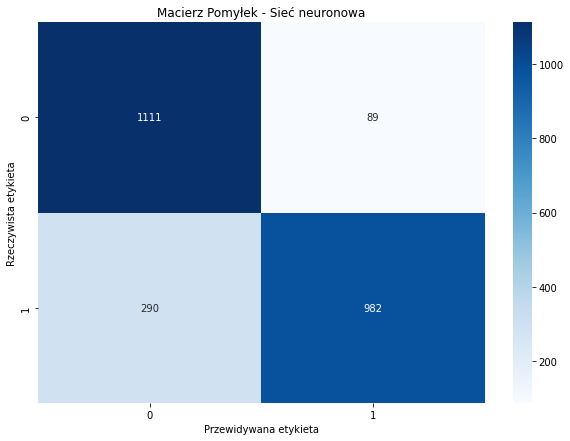

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import time
import seaborn as sns
import matplotlib.pyplot as plt

start_time = time.time()

# Funkcja aktywacji 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 -= self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 -= X.T.dot(hidden_delta) * learning_rate
        self.bias2 -= np.sum(output_delta, axis=0) * learning_rate
        self.bias1 -= np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = -np.mean(y * np.log(self.output) + (1 - y) * np.log(1 - self.output))
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy = df[combo].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

param_grid = {
    'hidden_size': [5, 10, 15],
    'epochs': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1]
}

best_accuracy = 0
best_params = {}

for hidden_size, epochs, learning_rate in itertools.product(param_grid['hidden_size'], param_grid['epochs'], param_grid['learning_rate']):
    nn = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    nn.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate)
    
    y_pred = nn.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'hidden_size': hidden_size, 'epochs': epochs, 'learning_rate': learning_rate}

print("Najlepsze parametry:", best_params)
print("Najlepsza dokładność:", best_accuracy)

nn_best = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=best_params['hidden_size'], output_size=1)
nn_best.train(X_train, y_train, epochs=best_params['epochs'], learning_rate=best_params['learning_rate'])

y_pred = nn_best.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu z najlepszymi parametrami:", accuracy)
print("Czas:", czas)

cm = confusion_matrix(y_test, y_pred_classes)
print("Macierz pomyłek:")
print(cm)
print(classification_report(y_test, y_pred_classes))

plt.figure(figsize=(10, 7))
plt.title("Macierz Pomyłek - Sieć neuronowa")
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Przewidywana etykieta')

Epoch 100/500 - Loss: 0.11245984566644135
Epoch 200/500 - Loss: 0.1101934473078395
Epoch 300/500 - Loss: 0.10931715417003157
Epoch 400/500 - Loss: 0.10873516579896705
Epoch 500/500 - Loss: 0.10815547992656442
Epoch 100/500 - Loss: 0.49514432074522874
Epoch 200/500 - Loss: 0.49514432074521275
Epoch 300/500 - Loss: 0.4951443207451968
Epoch 400/500 - Loss: 0.49514432074518083
Epoch 500/500 - Loss: 0.4951443207451648
Epoch 100/500 - Loss: 0.4951443215538171
Epoch 200/500 - Loss: 0.4951443215538171
Epoch 300/500 - Loss: 0.4951443215538171
Epoch 400/500 - Loss: 0.4951443215538171
Epoch 500/500 - Loss: 0.4951443215538171
Epoch 100/1000 - Loss: 0.11243400154609617
Epoch 200/1000 - Loss: 0.11027078658291667
Epoch 300/1000 - Loss: 0.10921610462384657
Epoch 400/1000 - Loss: 0.10869035992659423
Epoch 500/1000 - Loss: 0.10830702692920689
Epoch 600/1000 - Loss: 0.1079629008183796
Epoch 700/1000 - Loss: 0.10765884969217235
Epoch 800/1000 - Loss: 0.10738307462278787
Epoch 900/1000 - Loss: 0.1071415084

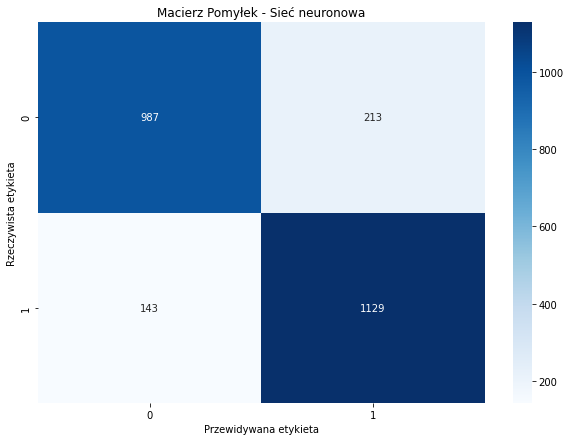

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import time
import seaborn as sns
import matplotlib.pyplot as plt

start_time = time.time()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)

    def feedforward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

#pca2 = ["3p", "3p_opp", "ft", "3par", "3par_opp", "fga_opp", "fga", "3p%", "3p%_opp", "drb", "3pa", "3pa_opp", "fg", "ft_opp"]
cechy = df[combo].values
zmienna_zalezna = df['won'].values.reshape(-1, 1)

scaler = StandardScaler()
cechy = scaler.fit_transform(cechy)

X_train, X_test, y_train, y_test = train_test_split(cechy, zmienna_zalezna, test_size=0.25, random_state=0)

param_grid = {
    'hidden_size': [5, 10, 15],
    'epochs': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1]
}

best_accuracy = 0
best_params = {}

for hidden_size, epochs, learning_rate in itertools.product(param_grid['hidden_size'], param_grid['epochs'], param_grid['learning_rate']):
    nn = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    nn.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate)
    
    y_pred = nn.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'hidden_size': hidden_size, 'epochs': epochs, 'learning_rate': learning_rate}

print("Najlepsze parametry:", best_params)
print("Najlepsza dokładność:", best_accuracy)

nn_best = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=best_params['hidden_size'], output_size=1)
nn_best.train(X_train, y_train, epochs=best_params['epochs'], learning_rate=best_params['learning_rate'])

y_pred = nn_best.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
czas = end_time - start_time
print("Dokładność modelu z najlepszymi parametrami:", accuracy)
print("Czas:", czas)

cm = confusion_matrix(y_test, y_pred_classes)
print("Macierz pomyłek:")
print(cm)
print(classification_report(y_test, y_pred_classes))

plt.figure(figsize=(10, 7))
plt.title("Macierz Pomyłek - Sieć neuronowa")
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Przewidywana etykieta')
#plt.savefig("NN_tuning.jpg")

In [19]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import sklearn
import time

print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)

Python version: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 19:29:22) [MSC v.1916 32 bit (Intel)]
NumPy version: 1.21.6
Matplotlib version: 3.5.3
Pandas version: 1.3.5
Seaborn version: 0.11.2
Scikit-learn version: 1.0.2
